In [174]:
'''using 5 machine learning models
steps of machine learning models :-
0-Read data
1-Exploring Data analysis =>EDA
2-Data preprocessing
3-Initate ML model
4-Fit data
5-Prediction
6-Evaluation
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk


from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix 
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics 
from sklearn import metrics

In [175]:
#0) Read data 
df=pd.read_csv('E:\\senior-1\\semester two\\Data Mining\\MIT-BIH Arrhythmia Database.csv')

#print dataset
df

record type  0_pre-RR  0_post-RR   0_pPeak   0_tPeak   0_rPeak  \
0          101    N        76      313.0  0.074347 -0.160548  1.036401   
1          101    N       313      315.0 -0.052079 -0.264784  0.886597   
2          101    N       315      321.0 -0.062151 -0.296983  0.991859   
3          101    N       321      336.0 -0.063322 -0.281386  1.034903   
4          101    N       336      344.0 -0.062915  1.046914  1.046408   
...        ...  ...       ...        ...       ...       ...       ...   
100684     234    N       240      241.0 -0.110230  1.420339  1.403346   
100685     234    N       241      243.0 -0.119014  1.424782  1.420328   
100686     234    N       243      252.0  0.173524 -0.443214  1.436878   
100687     234    N       252      244.0 -0.119820 -0.401522  1.337051   
100688     234    N       244      236.0  0.162909  1.416672  1.409440   

         0_sPeak   0_qPeak  0_qrs_interval  ...   1_qPeak  1_qrs_interval  \
0      -0.285662 -0.026824              41  ...  0.025930               2   
1      -0.366298 -0.059710              21  ... -0.042009              26   
2      -0.410306 -0.065686              22  ...  0.009528               3   
3      -0.403880 -0.071750              22  ... -0.020536               6   
4       1.046408 -0.074639              11  ...  0.016053              16   
...          ...       ...             ...  ...       ...             ...   
100684  1.403346 -0.115682              14  ... -0.069234               5   
100685  1.420328 -0.134406              13  ... -0.069530               7   
100686 -0.714642 -0.136431              38  ... -0.089396               9   
100687 -0.688560 -0.125076              27  ... -0.065487               3   
100688  1.409440 -0.118397              28  ... -0.078260               5   

        1_pq_interval  1_qt_interval  1_st_interval  1_qrs_morph0  \
0                  18             22              2      0.025930   
1                  27             62              9     -0.042009   
2                   8             12              1      0.009528   
3                   9             16              1     -0.020536   
4                   5             31             10      0.016053   
...               ...            ...            ...           ...   
100684              6             20              9     -0.069234   
100685              5             20              8     -0.069530   
100686              7             24              8     -0.089396   
100687              1             12              8     -0.065487   
100688              8             21              8     -0.078260   

        1_qrs_morph1  1_qrs_morph2  1_qrs_morph3  1_qrs_morph4  
0           0.025930      0.025930      0.025436      0.025436  
1          -0.029498      0.005012      0.030892      0.002986  
2           0.009528      0.008786      0.008786      0.008368  
3          -0.020257     -0.018965     -0.016968     -0.014555  
4           0.006742      0.002782     -0.007798     -0.051155  
...              ...           ...           ...           ...  
100684     -0.068378     -0.065373     -0.060779     -0.054383  
100685     -0.069290     -0.066317     -0.053437     -0.045120  
100686     -0.088155     -0.078611     -0.066763     -0.058650  
100687     -0.065487     -0.064941     -0.064941     -0.061120  
100688     -0.077918     -0.075665     -0.070433     -0.060190  

[100689 rows x 34 columns]

In [176]:
#0.1)
df.head()   #by default print the first 5 rows


record type  0_pre-RR  0_post-RR   0_pPeak   0_tPeak   0_rPeak   0_sPeak  \
0     101    N        76      313.0  0.074347 -0.160548  1.036401 -0.285662   
1     101    N       313      315.0 -0.052079 -0.264784  0.886597 -0.366298   
2     101    N       315      321.0 -0.062151 -0.296983  0.991859 -0.410306   
3     101    N       321      336.0 -0.063322 -0.281386  1.034903 -0.403880   
4     101    N       336      344.0 -0.062915  1.046914  1.046408  1.046408   

    0_qPeak  0_qrs_interval  ...   1_qPeak  1_qrs_interval  1_pq_interval  \
0 -0.026824              41  ...  0.025930               2             18   
1 -0.059710              21  ... -0.042009              26             27   
2 -0.065686              22  ...  0.009528               3              8   
3 -0.071750              22  ... -0.020536               6              9   
4 -0.074639              11  ...  0.016053              16              5   

   1_qt_interval  1_st_interval  1_qrs_morph0  1_qrs_morph1  1_qrs_morph2  \
0             22              2      0.025930      0.025930      0.025930   
1             62              9     -0.042009     -0.029498      0.005012   
2             12              1      0.009528      0.009528      0.008786   
3             16              1     -0.020536     -0.020257     -0.018965   
4             31             10      0.016053      0.006742      0.002782   

   1_qrs_morph3  1_qrs_morph4  
0      0.025436      0.025436  
1      0.030892      0.002986  
2      0.008786      0.008368  
3     -0.016968     -0.014555  
4     -0.007798     -0.051155  

[5 rows x 34 columns]

In [177]:
#0.2)
print("Columns Labels : ")
print(df.columns)   #names of columns


Columns Labels : 
Index(['record', 'type', '0_pre-RR', '0_post-RR', '0_pPeak', '0_tPeak',
       '0_rPeak', '0_sPeak', '0_qPeak', '0_qrs_interval', '0_pq_interval',
       '0_qt_interval', '0_st_interval', '0_qrs_morph0', '0_qrs_morph1',
       '0_qrs_morph2', '0_qrs_morph3', '0_qrs_morph4', '1_pre-RR', '1_post-RR',
       '1_pPeak', '1_tPeak', '1_rPeak', '1_sPeak', '1_qPeak', '1_qrs_interval',
       '1_pq_interval', '1_qt_interval', '1_st_interval', '1_qrs_morph0',
       '1_qrs_morph1', '1_qrs_morph2', '1_qrs_morph3', '1_qrs_morph4'],
      dtype='object')


In [178]:
##0.3)summary statistics for object Data    #object may be categorical or string

#Hint: loop checks all columns
#all_descriptions = []
# for col in df.columns:
#     if col != "type" and df[col].dtype != "object":
#         desc = df.groupby("type")[col].describe()
#         desc["attribute"] = col
#         desc = desc.reset_index()
#         all_descriptions.append(desc)

# final_descriptions_df = pd.concat(all_descriptions, ignore_index=True)
# final_descriptions_df 

des_0_pre_RR = df.groupby("type")["0_pre-RR"].describe()
print("des_0_pre_RR:\n", des_0_pre_RR, "\n")


des_0_pre_RR:
         count        mean         std   min    25%    50%    75%     max
type                                                                    
F       803.0  208.602740   34.372288  37.0  197.0  203.0  213.0   652.0
N     90083.0  289.308416   78.821497  11.0  240.0  275.0  331.0  2114.0
Q        15.0  203.733333  133.523388  24.0   66.0  228.0  280.0   475.0
SVEB   2779.0  219.399424   53.122123  37.0  174.0  242.0  264.0   396.0
VEB    7009.0  184.128549   53.890571  20.0  156.0  181.0  199.0   903.0 



In [179]:
des_0_post_RR = df.groupby("type")["0_post-RR"].describe()
print("des_0_post_RR:\n", des_0_post_RR, "\n")

des_0_post_RR:
         count        mean         std   min    25%    50%    75%     max
type                                                                    
F       803.0  190.125778   39.442314  68.0  165.0  195.0  203.5   509.0
N     90083.0  276.162772   72.533837   6.0  231.0  265.0  320.0  1497.0
Q        15.0  264.133333   98.451487  35.0  226.5  248.0  300.5   490.0
SVEB   2779.0  310.015113  186.395420  45.0  240.0  266.0  326.0  2114.0
VEB    7009.0  307.466400  103.734013  26.0  239.0  294.0  375.0   903.0 



In [180]:
des_0_pPeak = df.groupby("type")["0_pPeak"].describe()
print("des_0_pPeak:\n", des_0_pPeak, "\n")

des_0_pPeak:
         count      mean       std       min       25%       50%       75%  \
type                                                                        
F       803.0 -0.000152  0.185535 -0.375340 -0.180328  0.042677  0.133844   
N     90083.0  0.035449  0.140553 -3.094391 -0.059035  0.008119  0.111954   
Q        15.0  0.561390  0.997332 -0.243263 -0.015571  0.205968  0.654950   
SVEB   2779.0  0.050931  0.114878 -0.421942  0.011025  0.047979  0.070308   
VEB    7009.0  0.238021  0.324510 -0.967302  0.038387  0.173806  0.353765   

           max  
type            
F     1.230617  
N     3.821118  
Q     3.406981  
SVEB  0.985749  
VEB   2.176312   



In [181]:
des_0_tPeak = df.groupby("type")["0_tPeak"].describe()
print("des_0_tPeak:\n", des_0_tPeak, "\n")

des_0_tPeak:
         count      mean       std       min       25%       50%       75%  \
type                                                                        
F       803.0  0.426667  0.928807 -1.582135 -0.577833  0.586313  1.160507   
N     90083.0  0.357683  0.752508 -1.484831 -0.267993  0.214455  0.919678   
Q        15.0  0.471211  0.832627 -0.841308 -0.102038  0.439663  1.325119   
SVEB   2779.0  0.488695  0.468600 -0.894829  0.128806  0.528907  0.698421   
VEB    7009.0  0.507037  0.610269 -2.006422  0.105985  0.557820  1.009895   

           max  
type            
F     2.128751  
N     4.118327  
Q     1.833336  
SVEB  2.264349  
VEB   2.560806   



In [182]:
des_0_rPeak = df.groupby("type")["0_rPeak"].describe()
print("des_0_rPeak:\n", des_0_rPeak, "\n")

des_0_rPeak:
         count      mean       std       min       25%       50%       75%  \
type                                                                        
F       803.0  1.647521  0.598384 -1.453325  1.268530  1.649105  2.117415   
N     90083.0  1.103145  0.543423 -2.321045  0.796631  1.140175  1.433607   
Q        15.0  0.879073  0.936796 -0.491010  0.159045  0.842106  1.314064   
SVEB   2779.0  0.691429  0.433245 -0.664364  0.498810  0.619221  0.930982   
VEB    7009.0  0.505460  1.068165 -2.372835 -0.539579  0.844475  1.228085   

           max  
type            
F     2.718970  
N     4.018918  
Q     3.080710  
SVEB  2.752367  
VEB   2.520848   



In [183]:
des_0_sPeak = df.groupby("type")["0_sPeak"].describe()
print("des_0_sPeak:\n", des_0_sPeak, "\n")

des_0_sPeak:
         count      mean       std       min       25%       50%       75%  \
type                                                                        
F       803.0 -0.556404  1.257355 -2.663361 -1.379301 -1.148551  1.078159   
N     90083.0 -0.068285  1.002669 -3.622550 -0.749607 -0.495805  0.891407   
Q        15.0 -0.727784  0.613446 -1.631210 -1.318865 -0.842962 -0.259752   
SVEB   2779.0  0.244229  0.716044 -1.863295 -0.431550  0.491495  0.667537   
VEB    7009.0 -1.084290  0.909354 -3.111706 -1.758037 -1.264825 -0.614453   

           max  
type            
F     2.123365  
N     4.018918  
Q     0.223959  
SVEB  2.228378  
VEB   1.990037   



In [184]:
des_0_qPeak = df.groupby("type")["0_qPeak"].describe()
print("des_0_qPeak:\n", des_0_qPeak, "\n")

des_0_qPeak:
         count      mean       std       min       25%       50%       75%  \
type                                                                        
F       803.0 -0.136713  0.175993 -1.453325 -0.245708 -0.085208 -0.023908   
N     90083.0 -0.075928  0.120036 -3.871359 -0.126272 -0.069594 -0.018530   
Q        15.0 -0.020443  1.067802 -1.952061 -0.395655 -0.026488  0.045123   
SVEB   2779.0 -0.030453  0.147538 -0.763316 -0.067426  0.019757  0.042668   
VEB    7009.0 -0.295954  0.518942 -2.372835 -0.601466 -0.189789  0.022110   

           max  
type            
F     1.228729  
N     2.129282  
Q     3.080710  
SVEB  0.498941  
VEB   2.163584   



In [185]:
des_0_qrs_interval = df.groupby("type")["0_qrs_interval"].describe()
print("des_0_qrs_interval:\n", des_0_qrs_interval, "\n")

des_0_qrs_interval:
         count       mean        std  min   25%   50%   75%    max
type                                                             
F       803.0  33.566625  10.639595  3.0  27.0  32.0  44.0   59.0
N     90083.0  27.808377  13.318390  0.0  19.0  27.0  37.0  170.0
Q        15.0  39.266667  30.529767  5.0  15.5  40.0  55.0  119.0
SVEB   2779.0  22.931990  14.208999  1.0  14.0  20.0  28.0  117.0
VEB    7009.0  36.505921  28.008458  0.0   5.0  34.0  57.0  149.0 



In [186]:
des_0_pq_interval = df.groupby("type")["0_pq_interval"].describe()
print("des_0_pq_interval:\n", des_0_pq_interval, "\n")

des_0_pq_interval:
         count       mean        std  min  25%   50%   75%    max
type                                                            
F       803.0  11.211706   7.347282  1.0  5.0  13.0  16.0   95.0
N     90083.0  10.504779   8.615410  1.0  4.0   7.0  16.0  122.0
Q        15.0  16.933333  25.571934  2.0  5.0   7.0  13.5   89.0
SVEB   2779.0   8.828715   8.428466  1.0  4.0   6.0   8.0   60.0
VEB    7009.0  17.798259  15.720785  1.0  7.0  10.0  29.0  150.0 



In [187]:
des_0_qt_interval = df.groupby("type")["0_qt_interval"].describe()
print("des_0_qt_interval:\n", des_0_qt_interval, "\n")

des_0_qt_interval:
         count       mean        std   min   25%   50%    75%    max
type                                                               
F       803.0  75.870486  40.740321   9.0  44.0  54.0  117.0  169.0
N     90083.0  57.595817  38.263715   5.0  33.0  45.0   72.0  328.0
Q        15.0  86.533333  67.616425  15.0  30.5  69.0  125.0  211.0
SVEB   2779.0  40.258006  28.425898  11.0  21.0  30.0   51.0  223.0
VEB    7009.0  93.635611  52.006373  11.0  49.0  80.0  133.0  334.0 



In [188]:
des_0_st_interval = df.groupby("type")["0_st_interval"].describe()
print("des_0_st_interval:\n", des_0_st_interval, "\n")

des_0_st_interval:
         count       mean        std  min   25%   50%   75%    max
type                                                             
F       803.0  31.092154  34.103356  1.0   4.0   9.0  75.0  104.0
N     90083.0  19.282662  29.297233  1.0   1.0   8.0  14.0  141.0
Q        15.0  30.333333  35.525980  2.0   6.0  12.0  59.5  117.0
SVEB   2779.0   8.497301  16.709011  1.0   1.0   1.0   8.0  125.0
VEB    7009.0  39.331431  30.385318  1.0  13.0  34.0  61.0  125.0 



In [189]:
des_0_qrs_morph0 = df.groupby("type")["0_qrs_morph0"].describe()
print("des_0_qrs_morph0:\n", des_0_qrs_morph0, "\n")

des_0_qrs_morph0:
         count      mean       std       min       25%       50%       75%  \
type                                                                        
F       803.0 -0.136713  0.175993 -1.453325 -0.245708 -0.085208 -0.023908   
N     90083.0 -0.075928  0.120036 -3.871359 -0.126272 -0.069594 -0.018530   
Q        15.0 -0.020443  1.067802 -1.952061 -0.395655 -0.026488  0.045123   
SVEB   2779.0 -0.030453  0.147538 -0.763316 -0.067426  0.019757  0.042668   
VEB    7009.0 -0.295954  0.518942 -2.372835 -0.601466 -0.189789  0.022110   

           max  
type            
F     1.228729  
N     2.129282  
Q     3.080710  
SVEB  0.498941  
VEB   2.163584   



In [190]:
des_0_qrs_morph1 = df.groupby("type")["0_qrs_morph1"].describe()
print("des_0_qrs_morph1:\n", des_0_qrs_morph1, "\n")

des_0_qrs_morph1:
         count      mean       std       min       25%       50%       75%  \
type                                                                        
F       803.0  0.056130  0.214551 -1.722791 -0.020128  0.060310  0.164344   
N     90083.0  0.026439  0.190674 -2.321045 -0.070722 -0.002261  0.097091   
Q        15.0  0.225442  0.937947 -1.274559 -0.142969  0.153313  0.512749   
SVEB   2779.0  0.005643  0.177684 -0.768497 -0.029002  0.039300  0.061915   
VEB    7009.0 -0.248656  0.647320 -2.629032 -0.668336 -0.086512  0.213235   

           max  
type            
F     1.238072  
N     2.109813  
Q     2.869694  
SVEB  0.781626  
VEB   1.839905   



In [191]:
des_0_qrs_morph2 = df.groupby("type")["0_qrs_morph2"].describe()
print("des_0_qrs_morph2:\n", des_0_qrs_morph2, "\n")

des_0_qrs_morph2:
         count      mean       std       min       25%       50%       75%  \
type                                                                        
F       803.0  0.725401  0.702247 -1.931899  0.133985  0.594417  1.400797   
N     90083.0  0.338229  0.495630 -2.407612  0.002302  0.123424  0.632311   
Q        15.0  0.415091  0.966195 -1.054227 -0.381956  0.203023  1.111589   
SVEB   2779.0  0.119749  0.318367 -0.868948  0.030860  0.074172  0.133194   
VEB    7009.0 -0.057187  0.954510 -2.840410 -0.762764  0.049601  0.528158   

           max  
type            
F     2.281207  
N     3.331326  
Q     2.210045  
SVEB  1.769741  
VEB   2.309413   



In [192]:
des_0_qrs_morph3 = df.groupby("type")["0_qrs_morph3"].describe()
print("des_0_qrs_morph3:\n", des_0_qrs_morph3, "\n")

des_0_qrs_morph3:
         count      mean       std       min       25%       50%       75%  \
type                                                                        
F       803.0  1.166573  0.791959 -2.072106  0.540008  1.100814  1.933397   
N     90083.0  0.589973  0.557065 -2.470184  0.179680  0.511542  0.951876   
Q        15.0  0.291197  0.891706 -1.304799 -0.280148  0.310804  1.085297   
SVEB   2779.0  0.243174  0.386505 -0.953109  0.078130  0.157896  0.394088   
VEB    7009.0  0.105266  1.119902 -2.995204 -0.844735  0.400072  0.901410   

           max  
type            
F     2.578144  
N     3.224798  
Q     1.435719  
SVEB  2.217564  
VEB   2.225070   



In [193]:
des_0_qrs_morph4 = df.groupby("type")["0_qrs_morph4"].describe()
print("des_0_qrs_morph4:\n", des_0_qrs_morph4, "\n")

des_0_qrs_morph4:
         count      mean       std       min       25%       50%       75%  \
type                                                                        
F       803.0  0.546656  0.565692 -2.141906  0.131467  0.597730  0.907356   
N     90083.0  0.327522  0.519274 -2.505479  0.001016  0.285196  0.631965   
Q        15.0 -0.261702  0.656886 -1.500049 -0.564095 -0.088051  0.014438   
SVEB   2779.0  0.253399  0.374119 -1.009224  0.123155  0.264638  0.394996   
VEB    7009.0 -0.234803  0.991382 -3.086096 -0.995956 -0.029948  0.505086   

           max  
type            
F     1.966445  
N     2.632724  
Q     1.066469  
SVEB  1.818357  
VEB   2.444145   



In [194]:
des_1_pre_RR = df.groupby("type")["1_pre-RR"].describe()
print("des_1_pre_RR:\n", des_1_pre_RR, "\n")

des_1_pre_RR:
         count        mean         std   min    25%    50%    75%     max
type                                                                    
F       803.0  208.602740   34.372288  37.0  197.0  203.0  213.0   652.0
N     90083.0  289.308416   78.821497  11.0  240.0  275.0  331.0  2114.0
Q        15.0  203.733333  133.523388  24.0   66.0  228.0  280.0   475.0
SVEB   2779.0  219.399424   53.122123  37.0  174.0  242.0  264.0   396.0
VEB    7009.0  184.128549   53.890571  20.0  156.0  181.0  199.0   903.0 



In [195]:
des_1_post_RR = df.groupby("type")["1_post-RR"].describe()
print("des_1_post_RR:\n", des_1_post_RR, "\n")

des_1_post_RR:
         count        mean         std   min    25%    50%    75%     max
type                                                                    
F       803.0  190.125778   39.442314  68.0  165.0  195.0  203.5   509.0
N     90083.0  276.162772   72.533837   6.0  231.0  265.0  320.0  1497.0
Q        15.0  264.133333   98.451487  35.0  226.5  248.0  300.5   490.0
SVEB   2779.0  310.015113  186.395420  45.0  240.0  266.0  326.0  2114.0
VEB    7009.0  307.466400  103.734013  26.0  239.0  294.0  375.0   903.0 



In [196]:
des_1_pPeak = df.groupby("type")["1_pPeak"].describe()
print("des_1_pPeak:\n", des_1_pPeak, "\n")

des_1_pPeak:
         count      mean       std       min       25%       50%       75%  \
type                                                                        
F       803.0  0.104168  0.157346 -0.793710 -0.002377  0.030179  0.227011   
N     90083.0  0.028729  0.121563 -2.108257 -0.015251  0.014604  0.058123   
Q        15.0  0.138419  0.224315 -0.242020  0.016785  0.093861  0.315203   
SVEB   2779.0  0.014135  0.116210 -0.919893 -0.007913  0.008012  0.026850   
VEB    7009.0  0.048504  0.244212 -1.357336 -0.041107  0.016285  0.092176   

           max  
type            
F     0.514502  
N     5.161310  
Q     0.566701  
SVEB  4.034142  
VEB   4.774181   



In [197]:
des_1_tPeak = df.groupby("type")["1_tPeak"].describe()
print("des_1_tPeak:\n", des_1_tPeak, "\n")

des_1_tPeak:
         count      mean       std       min       25%       50%       75%  \
type                                                                        
F       803.0  0.848341  0.529535 -0.967083  0.517771  0.755621  1.125053   
N     90083.0  0.341282  0.363101 -2.493494  0.099627  0.264492  0.588559   
Q        15.0  0.373493  0.322527  0.021683  0.132332  0.305345  0.574597   
SVEB   2779.0  0.329142  0.249712 -1.039583  0.206821  0.339047  0.413505   
VEB    7009.0  0.589183  0.496640 -1.702058  0.289248  0.552473  0.790876   

           max  
type            
F     2.238387  
N     7.002694  
Q     1.076890  
SVEB  2.379348  
VEB   2.958263   



In [198]:
des_1_rPeak = df.groupby("type")["1_rPeak"].describe()
print("des_1_rPeak:\n", des_1_rPeak, "\n")

des_1_rPeak:
         count      mean       std       min       25%       50%       75%  \
type                                                                        
F       803.0 -1.279614  0.923121 -3.008446 -2.182090 -0.866294 -0.628074   
N     90083.0 -0.109539  0.589665 -3.847312 -0.379122 -0.078442  0.106278   
Q        15.0 -0.258442  0.306521 -0.815364 -0.499699 -0.190205 -0.059090   
SVEB   2779.0 -0.088281  0.339559 -2.021925 -0.103693  0.002712  0.035696   
VEB    7009.0 -0.212149  0.611872 -3.094737 -0.637659 -0.232500  0.174363   

           max  
type            
F     1.889282  
N     4.033554  
Q     0.201296  
SVEB  3.057928  
VEB   3.839972   



In [199]:
des_1_sPeak = df.groupby("type")["1_sPeak"].describe()
print("des_1_sPeak:\n", des_1_sPeak, "\n")

des_1_sPeak:
         count      mean       std       min       25%       50%       75%  \
type                                                                        
F       803.0 -1.505412  0.982088 -3.065915 -2.578512 -0.938058 -0.753160   
N     90083.0 -0.471911  0.573161 -6.154873 -0.788099 -0.360060 -0.157411   
Q        15.0 -0.500821  0.247323 -0.996073 -0.603752 -0.551056 -0.338579   
SVEB   2779.0 -0.421011  0.303543 -4.701907 -0.467809 -0.362978 -0.294914   
VEB    7009.0 -0.552272  0.665335 -4.302888 -0.869773 -0.582333 -0.110858   

           max  
type            
F     1.889282  
N     3.317595  
Q    -0.053824  
SVEB  1.395516  
VEB   2.414291   



In [200]:
des_1_qPeak = df.groupby("type")["1_qPeak"].describe()
print("des_1_qPeak:\n", des_1_qPeak, "\n")

des_1_qPeak:
         count      mean       std       min       25%       50%       75%  \
type                                                                        
F       803.0 -1.401350  0.979746 -3.037850 -2.584035 -0.877768 -0.672626   
N     90083.0 -0.304947  0.420802 -5.481982 -0.484782 -0.105255 -0.027623   
Q        15.0 -0.408503  0.423044 -1.548658 -0.632850 -0.278201 -0.133991   
SVEB   2779.0 -0.157125  0.298159 -4.248657 -0.156070 -0.027240 -0.009154   
VEB    7009.0 -0.473497  0.532840 -3.714946 -0.702634 -0.388070 -0.103331   

           max  
type            
F     0.201406  
N     4.033554  
Q     0.143144  
SVEB  0.785993  
VEB   3.398384   



In [201]:
des_1_qrs_interval = df.groupby("type")["1_qrs_interval"].describe()
print("des_1_qrs_interval:\n", des_1_qrs_interval, "\n")

des_1_qrs_interval:
         count       mean        std  min  25%   50%   75%    max
type                                                            
F       803.0   4.861768   7.717879  0.0  2.0   4.0   6.0  157.0
N     90083.0  10.984836  11.592990  0.0  3.0   6.0  18.0  260.0
Q        15.0   9.133333   6.895823  1.0  4.5   8.0  10.0   26.0
SVEB   2779.0  13.241094   9.136917  0.0  5.0  14.0  20.0   93.0
VEB    7009.0  14.064060  17.354706  0.0  4.0   7.0  19.0  161.0 



In [202]:
des_1_pq_interval = df.groupby("type")["1_pq_interval"].describe()
print("des_1_pq_interval:\n", des_1_pq_interval, "\n")

des_1_pq_interval:
         count       mean        std  min  25%   50%   75%    max
type                                                            
F       803.0  14.242839   6.488398  1.0  9.0  14.0  19.0   84.0
N     90083.0   9.826160   7.229262  1.0  5.0   8.0  13.0  185.0
Q        15.0  12.333333   7.650086  1.0  7.0  10.0  18.0   27.0
SVEB   2779.0   8.770421   7.717742  1.0  4.0   7.0  10.0  123.0
VEB    7009.0  19.229134  18.093405  1.0  9.0  15.0  22.0  175.0 



In [203]:
des_1_qt_interval = df.groupby("type")["1_qt_interval"].describe()
print("des_1_qt_interval:\n", des_1_qt_interval, "\n")

des_1_qt_interval:
         count       mean        std   min   25%   50%   75%    max
type                                                              
F       803.0  35.961395  10.434919  11.0  28.0  35.0  42.0  161.0
N     90083.0  34.735100  14.950211   5.0  24.0  31.0  43.0  412.0
Q        15.0  48.133333  28.891093  20.0  30.5  39.0  52.5  133.0
SVEB   2779.0  34.451241  14.634325   5.0  24.0  34.0  40.0  342.0
VEB    7009.0  54.471822  32.013492   6.0  38.0  47.0  59.0  400.0 



In [204]:
des_1_st_interval = df.groupby("type")["1_st_interval"].describe()
print("des_1_st_interval:\n", des_1_st_interval, "\n")

des_1_st_interval:
         count       mean        std  min   25%   50%   75%    max
type                                                             
F       803.0  16.856787   4.372398  1.0  14.0  17.0  19.0   34.0
N     90083.0  13.924103   8.370766  1.0   9.0  12.0  17.0  206.0
Q        15.0  26.666667  24.274227  2.0  13.5  17.0  31.0   99.0
SVEB   2779.0  12.439727   5.745962  1.0  11.0  11.0  12.0  159.0
VEB    7009.0  21.178627  15.039163  1.0  12.0  19.0  31.0  215.0 



In [205]:
des_1_qrs_morph0 = df.groupby("type")["1_qrs_morph0"].describe()
print("des_1_qrs_morph0:\n", des_1_qrs_morph0, "\n")

des_1_qrs_morph0:
         count      mean       std       min       25%       50%       75%  \
type                                                                        
F       803.0 -1.401350  0.979746 -3.037850 -2.584035 -0.877768 -0.672626   
N     90083.0 -0.304947  0.420802 -5.481982 -0.484782 -0.105255 -0.027623   
Q        15.0 -0.408503  0.423044 -1.548658 -0.632850 -0.278201 -0.133991   
SVEB   2779.0 -0.157125  0.298159 -4.248657 -0.156070 -0.027240 -0.009154   
VEB    7009.0 -0.473497  0.532840 -3.714946 -0.702634 -0.388070 -0.103331   

           max  
type            
F     0.201406  
N     4.033554  
Q     0.143144  
SVEB  0.785993  
VEB   3.398384   



In [206]:
des_1_qrs_morph1 = df.groupby("type")["1_qrs_morph1"].describe()
print("des_1_qrs_morph1:\n", des_1_qrs_morph1, "\n")

des_1_qrs_morph1:
         count      mean       std       min       25%       50%       75%  \
type                                                                        
F       803.0 -1.429395  0.968604 -3.017590 -2.560488 -0.885425 -0.690757   
N     90083.0 -0.303010  0.430367 -4.493784 -0.506666 -0.107637 -0.015374   
Q        15.0 -0.404672  0.409598 -1.448839 -0.657789 -0.226999 -0.136099   
SVEB   2779.0 -0.149715  0.296513 -2.388126 -0.152520 -0.028718  0.000262   
VEB    7009.0 -0.447518  0.551531 -3.511014 -0.693424 -0.383133 -0.086003   

           max  
type            
F     0.475487  
N     3.585718  
Q     0.189707  
SVEB  0.790034  
VEB   3.148790   



In [207]:

des_1_qrs_morph2 = df.groupby("type")["1_qrs_morph2"].describe()
print("des_1_qrs_morph2:\n", des_1_qrs_morph2, "\n")


des_1_qrs_morph2:
         count      mean       std       min       25%       50%       75%  \
type                                                                        
F       803.0 -1.478200  0.972411 -3.008446 -2.560619 -0.905398 -0.716512   
N     90083.0 -0.294510  0.496227 -4.398122 -0.587811 -0.146026  0.018295   
Q        15.0 -0.424247  0.383378 -1.185659 -0.706523 -0.367212 -0.196872   
SVEB   2779.0 -0.151566  0.340895 -2.856452 -0.199042 -0.020760  0.024132   
VEB    7009.0 -0.420702  0.595264 -3.286466 -0.707262 -0.395193 -0.033451   

           max  
type            
F     0.683343  
N     2.691557  
Q     0.188569  
SVEB  1.270265  
VEB   2.379443   



In [208]:
des_1_qrs_morph3 = df.groupby("type")["1_qrs_morph3"].describe()
print("des_1_qrs_morph3:\n", des_1_qrs_morph3, "\n")


des_1_qrs_morph3:
         count      mean       std       min       25%       50%       75%  \
type                                                                        
F       803.0 -1.501887  0.972914 -3.008446 -2.553363 -0.913783 -0.727077   
N     90083.0 -0.276876  0.581861 -4.069726 -0.604497 -0.189616  0.051940   
Q        15.0 -0.447666  0.310353 -0.834823 -0.697742 -0.487378 -0.263293   
SVEB   2779.0 -0.189838  0.360470 -3.882442 -0.279992 -0.062732  0.005428   
VEB    7009.0 -0.429877  0.594893 -3.286466 -0.746224 -0.391467  0.021219   

           max  
type            
F     0.450228  
N     3.755566  
Q     0.123946  
SVEB  2.423018  
VEB   1.918777   



In [209]:
des_1_qrs_morph4 = df.groupby("type")["1_qrs_morph4"].describe()
print("des_1_qrs_morph4:\n", des_1_qrs_morph4, "\n")

des_1_qrs_morph4:
         count      mean       std       min       25%       50%       75%  \
type                                                                        
F       803.0 -1.513908  0.982316 -3.016091 -2.561172 -0.918592 -0.741466   
N     90083.0 -0.349019  0.573949 -3.991484 -0.655522 -0.248916 -0.047660   
Q        15.0 -0.489034  0.242056 -0.945575 -0.611411 -0.529616 -0.298853   
SVEB   2779.0 -0.311011  0.326513 -4.520327 -0.365405 -0.234927 -0.139330   
VEB    7009.0 -0.485745  0.598362 -3.206732 -0.789300 -0.461338 -0.084246   

           max  
type            
F     0.918775  
N     2.869186  
Q    -0.133161  
SVEB  1.202811  
VEB   1.918604   



In [210]:
#0.4)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100689 entries, 0 to 100688
Data columns (total 34 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   record          100689 non-null  int64  
 1   type            100689 non-null  object 
 2   0_pre-RR        100689 non-null  int64  
 3   0_post-RR       100689 non-null  float64
 4   0_pPeak         100689 non-null  float64
 5   0_tPeak         100689 non-null  float64
 6   0_rPeak         100689 non-null  float64
 7   0_sPeak         100689 non-null  float64
 8   0_qPeak         100689 non-null  float64
 9   0_qrs_interval  100689 non-null  int64  
 10  0_pq_interval   100689 non-null  int64  
 11  0_qt_interval   100689 non-null  int64  
 12  0_st_interval   100689 non-null  int64  
 13  0_qrs_morph0    100689 non-null  float64
 14  0_qrs_morph1    100689 non-null  float64
 15  0_qrs_morph2    100689 non-null  float64
 16  0_qrs_morph3    100689 non-null  float64
 17  0_qrs_morp

In [211]:
#0.5)
shape=df.shape     #rows x columns
print(shape)

print("Number of Examples = ",df.shape[0])

(100689, 34)
Number of Examples =  100689


In [212]:
#0.6)
new_df = df.drop(columns=["type"])


In [213]:
new_df

record  0_pre-RR  0_post-RR   0_pPeak   0_tPeak   0_rPeak   0_sPeak  \
0          101        76      313.0  0.074347 -0.160548  1.036401 -0.285662   
1          101       313      315.0 -0.052079 -0.264784  0.886597 -0.366298   
2          101       315      321.0 -0.062151 -0.296983  0.991859 -0.410306   
3          101       321      336.0 -0.063322 -0.281386  1.034903 -0.403880   
4          101       336      344.0 -0.062915  1.046914  1.046408  1.046408   
...        ...       ...        ...       ...       ...       ...       ...   
100684     234       240      241.0 -0.110230  1.420339  1.403346  1.403346   
100685     234       241      243.0 -0.119014  1.424782  1.420328  1.420328   
100686     234       243      252.0  0.173524 -0.443214  1.436878 -0.714642   
100687     234       252      244.0 -0.119820 -0.401522  1.337051 -0.688560   
100688     234       244      236.0  0.162909  1.416672  1.409440  1.409440   

         0_qPeak  0_qrs_interval  0_pq_interval  ...   1_qPeak  \
0      -0.026824              41             18  ...  0.025930   
1      -0.059710              21              4  ... -0.042009   
2      -0.065686              22              3  ...  0.009528   
3      -0.071750              22              4  ... -0.020536   
4      -0.074639              11              4  ...  0.016053   
...          ...             ...            ...  ...       ...   
100684 -0.115682              14              3  ... -0.069234   
100685 -0.134406              13              5  ... -0.069530   
100686 -0.136431              38             21  ... -0.089396   
100687 -0.125076              27              5  ... -0.065487   
100688 -0.118397              28             21  ... -0.078260   

        1_qrs_interval  1_pq_interval  1_qt_interval  1_st_interval  \
0                    2             18             22              2   
1                   26             27             62              9   
2                    3              8             12              1   
3                    6              9             16              1   
4                   16              5             31             10   
...                ...            ...            ...            ...   
100684               5              6             20              9   
100685               7              5             20              8   
100686               9              7             24              8   
100687               3              1             12              8   
100688               5              8             21              8   

        1_qrs_morph0  1_qrs_morph1  1_qrs_morph2  1_qrs_morph3  1_qrs_morph4  
0           0.025930      0.025930      0.025930      0.025436      0.025436  
1          -0.042009     -0.029498      0.005012      0.030892      0.002986  
2           0.009528      0.009528      0.008786      0.008786      0.008368  
3          -0.020536     -0.020257     -0.018965     -0.016968     -0.014555  
4           0.016053      0.006742      0.002782     -0.007798     -0.051155  
...              ...           ...           ...           ...           ...  
100684     -0.069234     -0.068378     -0.065373     -0.060779     -0.054383  
100685     -0.069530     -0.069290     -0.066317     -0.053437     -0.045120  
100686     -0.089396     -0.088155     -0.078611     -0.066763     -0.058650  
100687     -0.065487     -0.065487     -0.064941     -0.064941     -0.061120  
100688     -0.078260     -0.077918     -0.075665     -0.070433     -0.060190  

[100689 rows x 33 columns]

In [214]:
df

record type  0_pre-RR  0_post-RR   0_pPeak   0_tPeak   0_rPeak  \
0          101    N        76      313.0  0.074347 -0.160548  1.036401   
1          101    N       313      315.0 -0.052079 -0.264784  0.886597   
2          101    N       315      321.0 -0.062151 -0.296983  0.991859   
3          101    N       321      336.0 -0.063322 -0.281386  1.034903   
4          101    N       336      344.0 -0.062915  1.046914  1.046408   
...        ...  ...       ...        ...       ...       ...       ...   
100684     234    N       240      241.0 -0.110230  1.420339  1.403346   
100685     234    N       241      243.0 -0.119014  1.424782  1.420328   
100686     234    N       243      252.0  0.173524 -0.443214  1.436878   
100687     234    N       252      244.0 -0.119820 -0.401522  1.337051   
100688     234    N       244      236.0  0.162909  1.416672  1.409440   

         0_sPeak   0_qPeak  0_qrs_interval  ...   1_qPeak  1_qrs_interval  \
0      -0.285662 -0.026824              41  ...  0.025930               2   
1      -0.366298 -0.059710              21  ... -0.042009              26   
2      -0.410306 -0.065686              22  ...  0.009528               3   
3      -0.403880 -0.071750              22  ... -0.020536               6   
4       1.046408 -0.074639              11  ...  0.016053              16   
...          ...       ...             ...  ...       ...             ...   
100684  1.403346 -0.115682              14  ... -0.069234               5   
100685  1.420328 -0.134406              13  ... -0.069530               7   
100686 -0.714642 -0.136431              38  ... -0.089396               9   
100687 -0.688560 -0.125076              27  ... -0.065487               3   
100688  1.409440 -0.118397              28  ... -0.078260               5   

        1_pq_interval  1_qt_interval  1_st_interval  1_qrs_morph0  \
0                  18             22              2      0.025930   
1                  27             62              9     -0.042009   
2                   8             12              1      0.009528   
3                   9             16              1     -0.020536   
4                   5             31             10      0.016053   
...               ...            ...            ...           ...   
100684              6             20              9     -0.069234   
100685              5             20              8     -0.069530   
100686              7             24              8     -0.089396   
100687              1             12              8     -0.065487   
100688              8             21              8     -0.078260   

        1_qrs_morph1  1_qrs_morph2  1_qrs_morph3  1_qrs_morph4  
0           0.025930      0.025930      0.025436      0.025436  
1          -0.029498      0.005012      0.030892      0.002986  
2           0.009528      0.008786      0.008786      0.008368  
3          -0.020257     -0.018965     -0.016968     -0.014555  
4           0.006742      0.002782     -0.007798     -0.051155  
...              ...           ...           ...           ...  
100684     -0.068378     -0.065373     -0.060779     -0.054383  
100685     -0.069290     -0.066317     -0.053437     -0.045120  
100686     -0.088155     -0.078611     -0.066763     -0.058650  
100687     -0.065487     -0.064941     -0.064941     -0.061120  
100688     -0.077918     -0.075665     -0.070433     -0.060190  

[100689 rows x 34 columns]

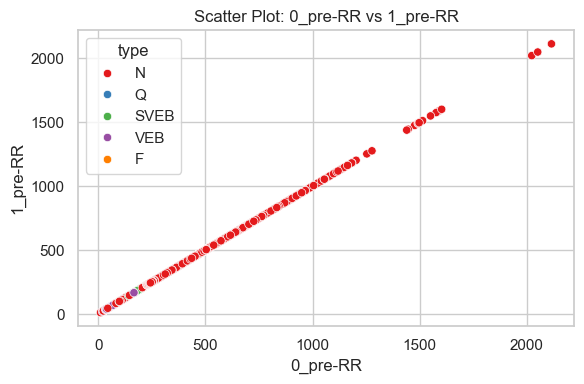

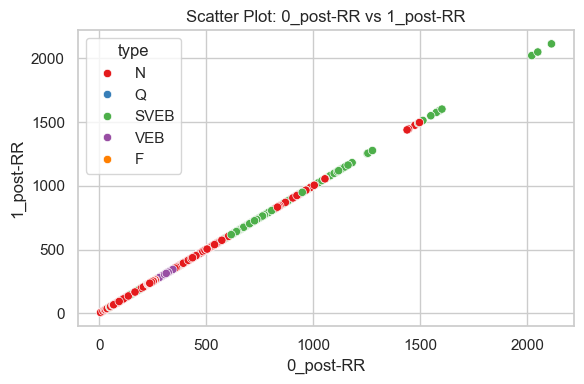

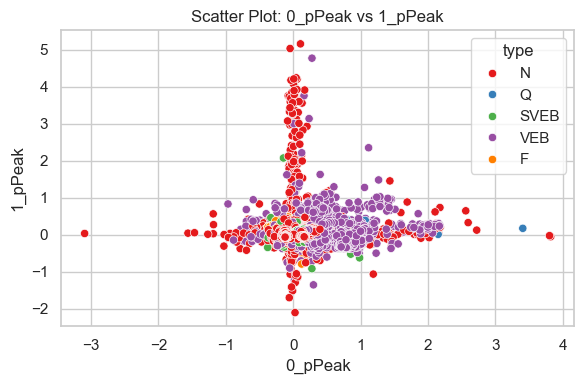

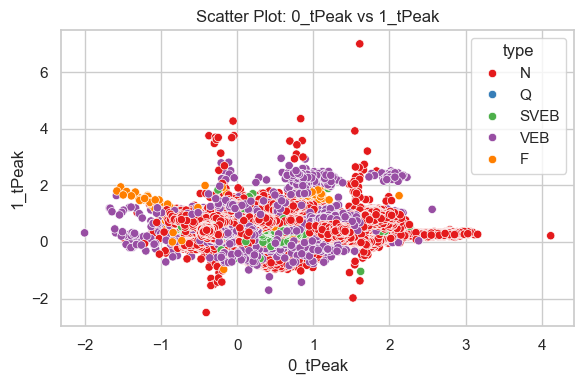

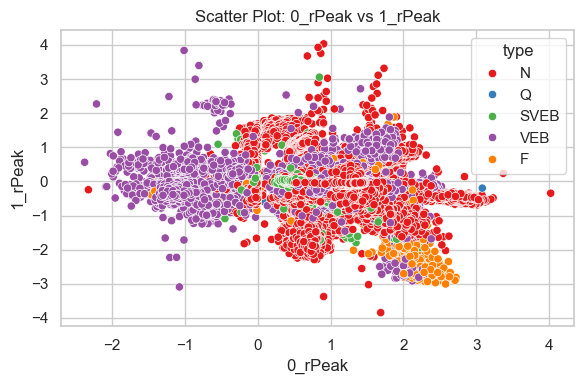

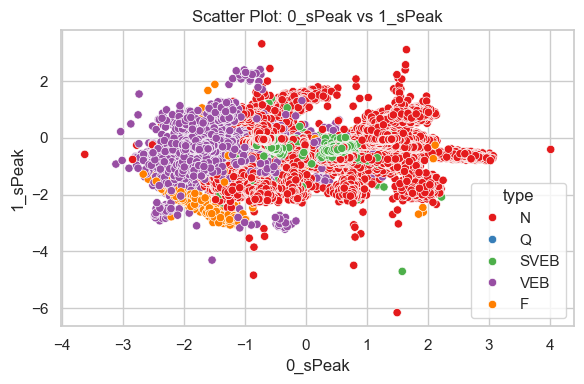

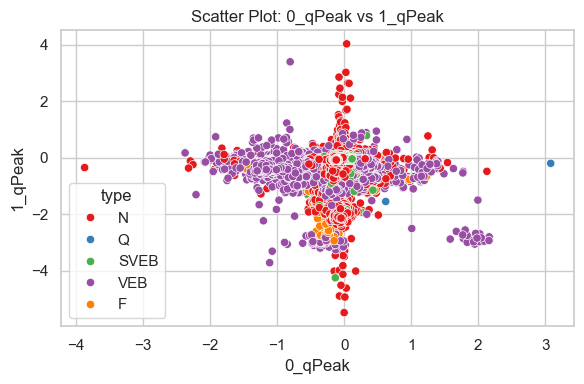

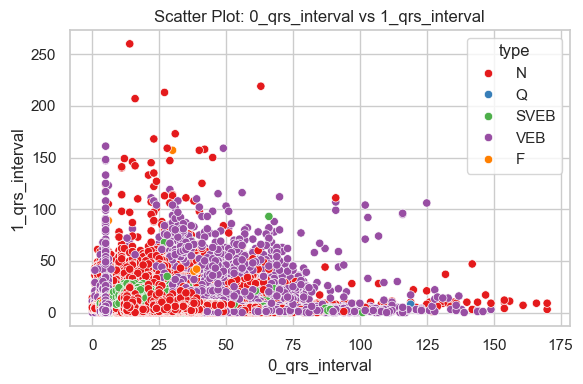

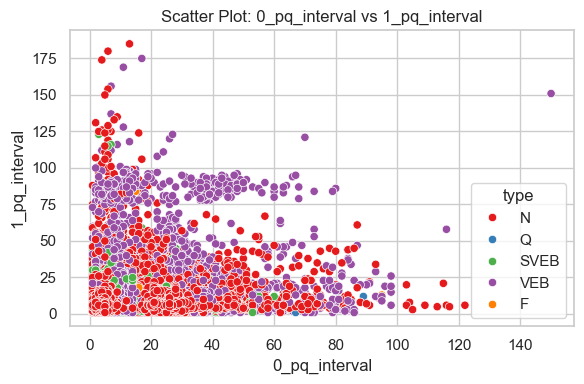

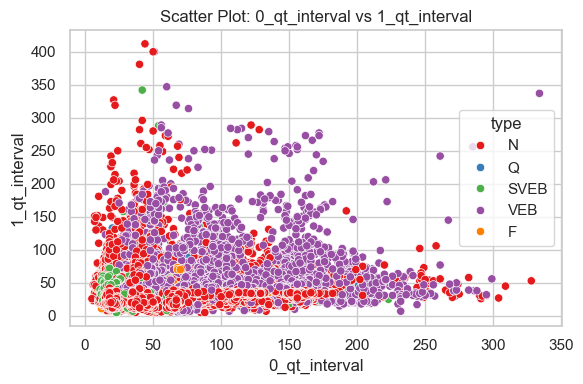

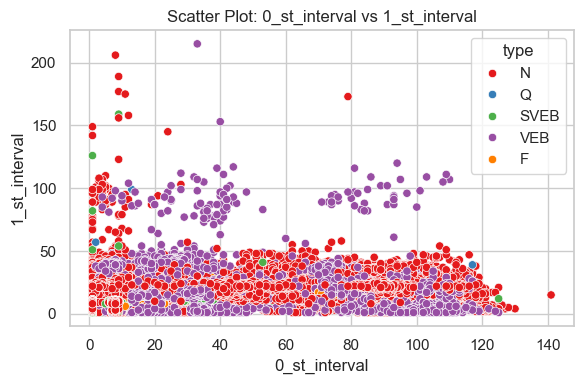

In [215]:
# #1)EDA
# 1.1) Scatter diagram with a categorical reference
# Optional: set style
sns.set(style="whitegrid")

# Use this list for common feature suffixes
feature_names = ['pre-RR', 'post-RR', 'pPeak', 'tPeak', 'rPeak', 'sPeak', 'qPeak',
                 'qrs_interval', 'pq_interval', 'qt_interval', 'st_interval']

# Loop through feature names and plot corresponding 0_ and 1_ versions
for feature in feature_names:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(
        x=f'0_{feature}', 
        y=f'1_{feature}', 
        hue='type',  # color-coded by arrhythmia type
        data=df,
        palette='Set1'
    )
    plt.title(f'Scatter Plot: 0_{feature} vs 1_{feature}')
    plt.xlabel(f'0_{feature}')
    plt.ylabel(f'1_{feature}')
    plt.tight_layout()
    plt.show()


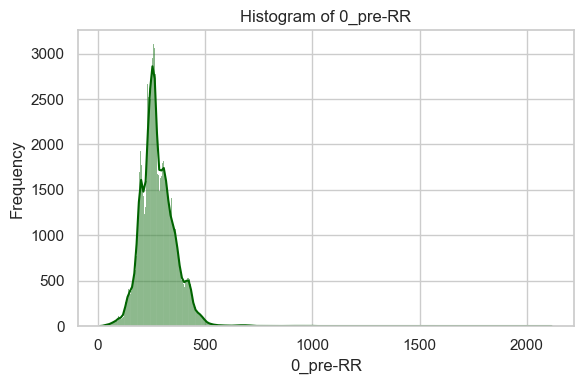

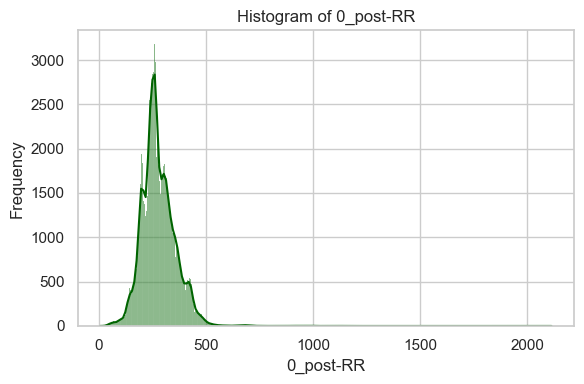

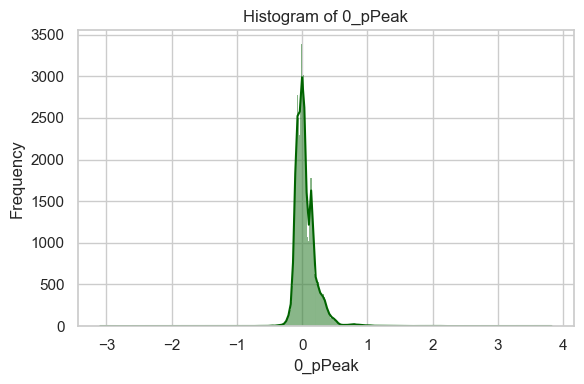

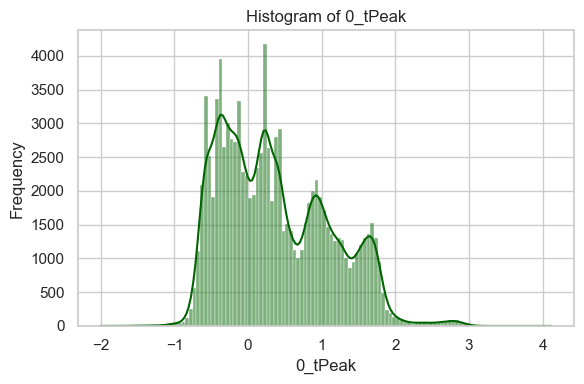

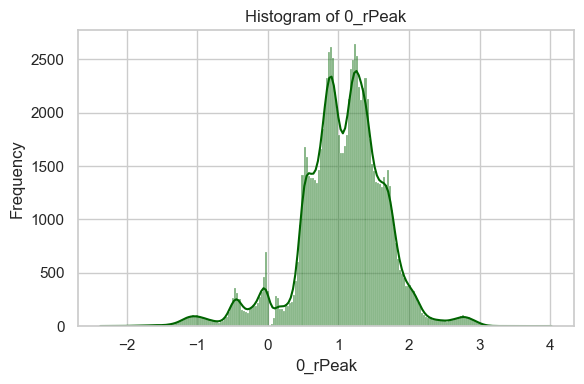

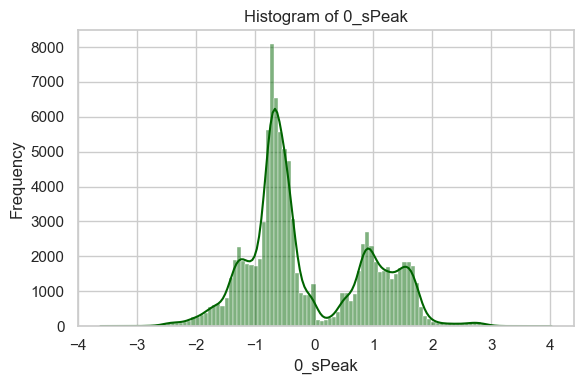

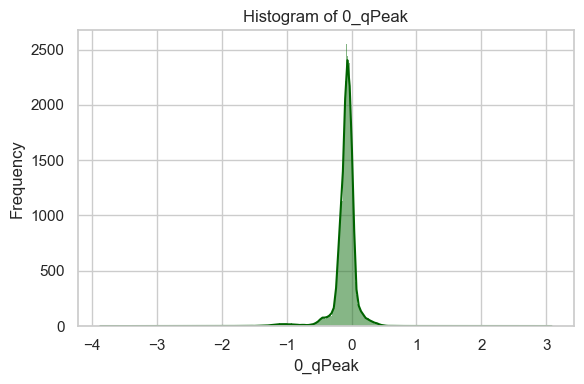

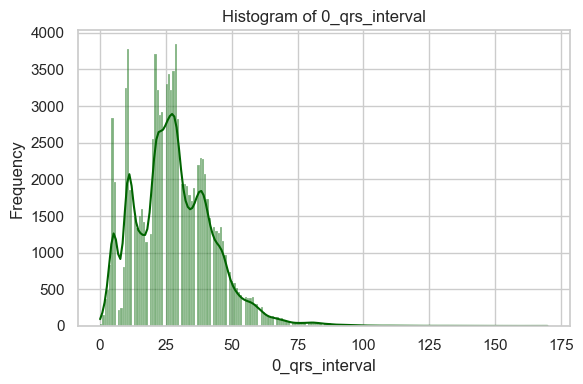

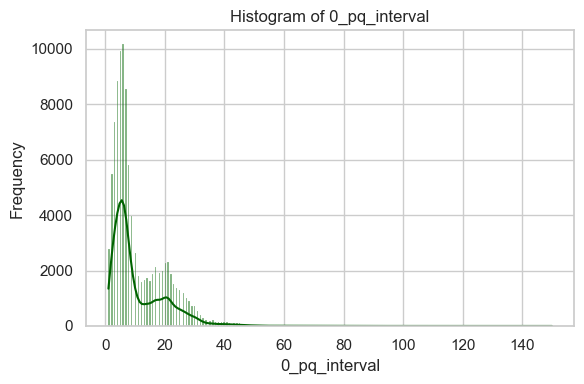

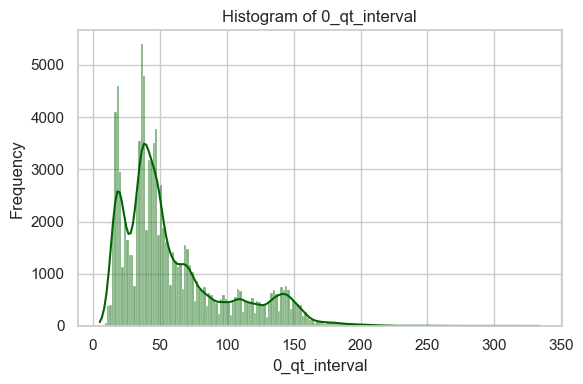

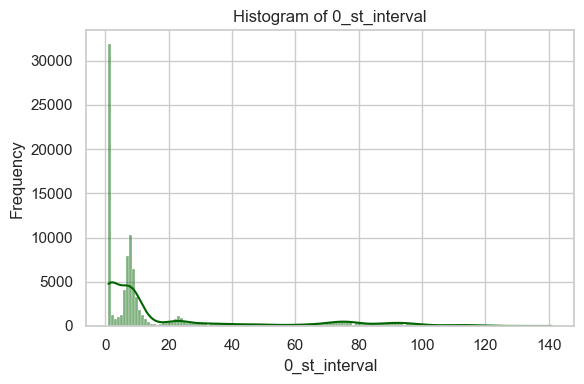

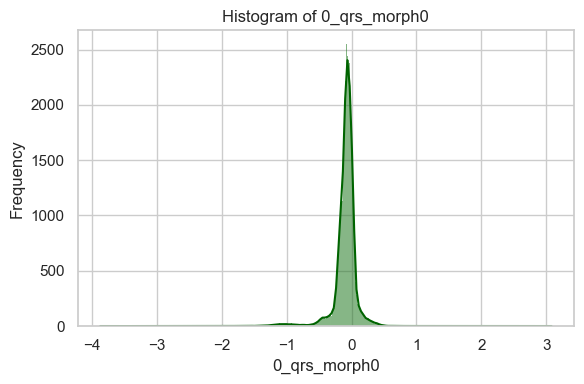

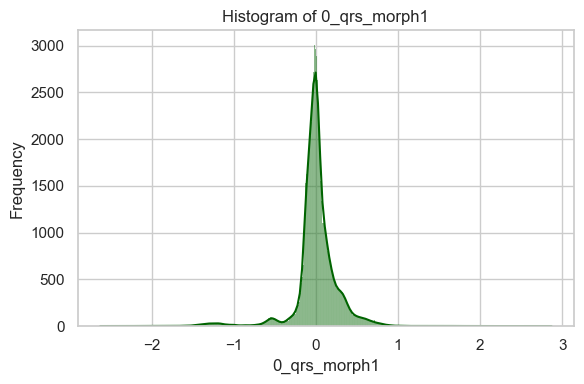

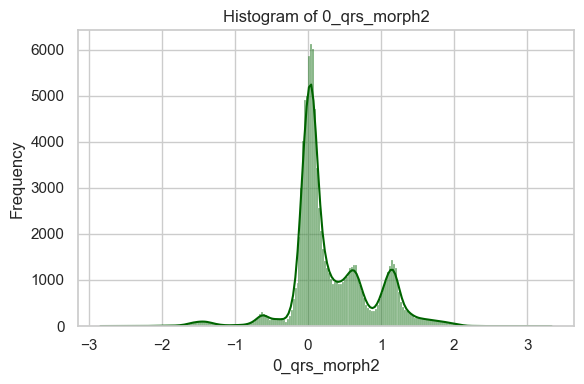

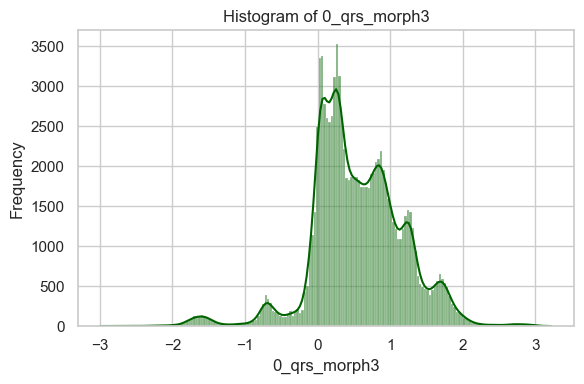

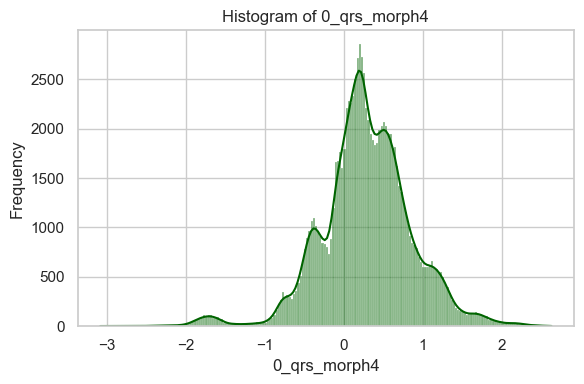

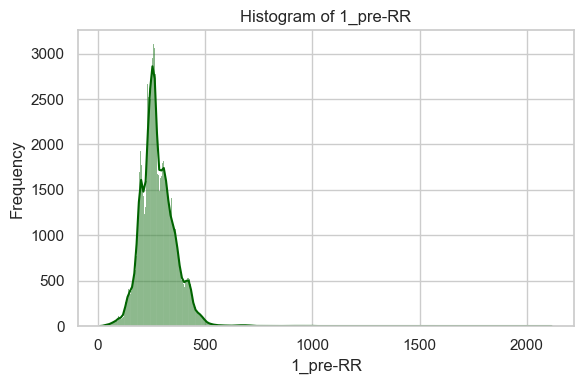

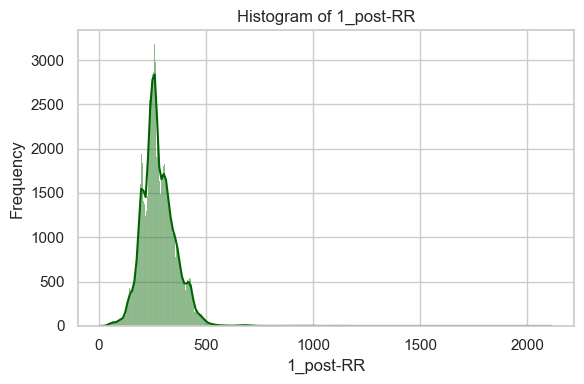

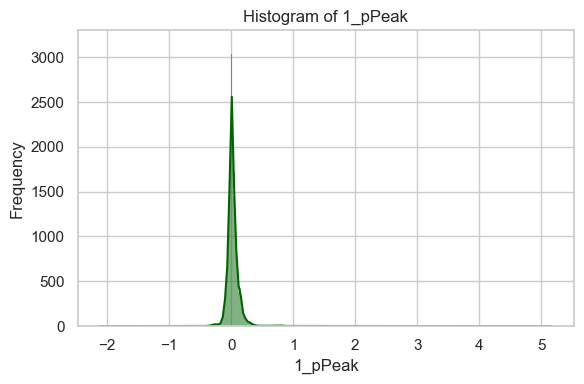

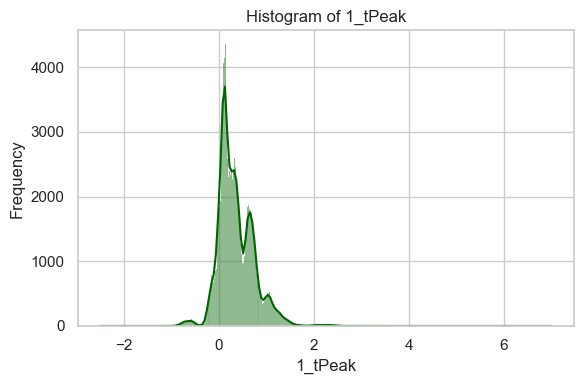

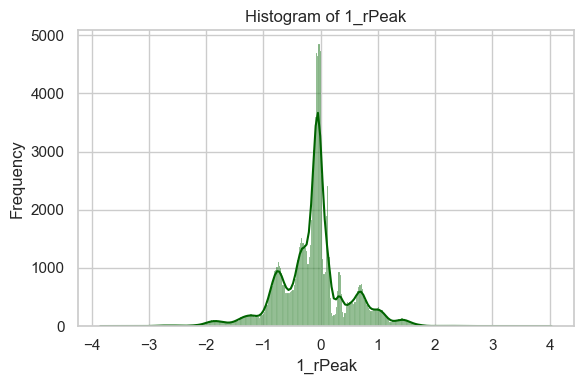

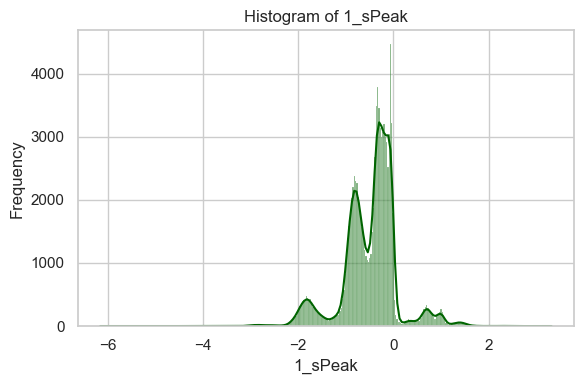

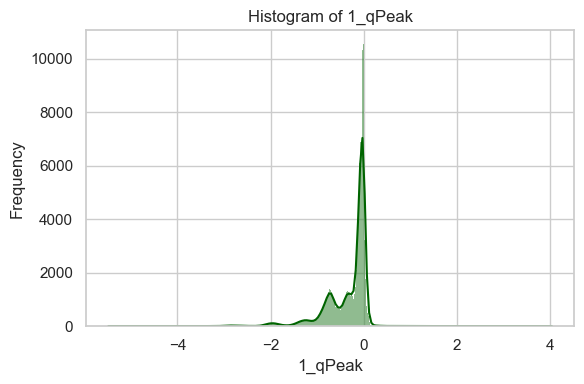

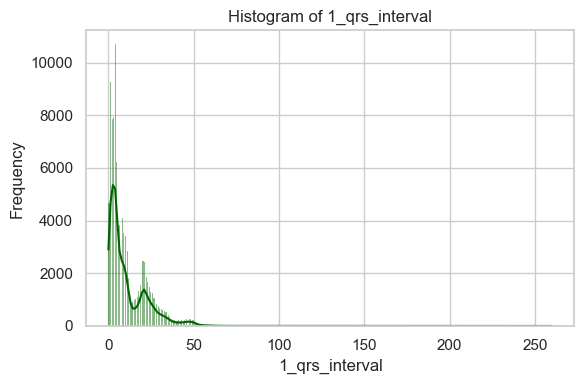

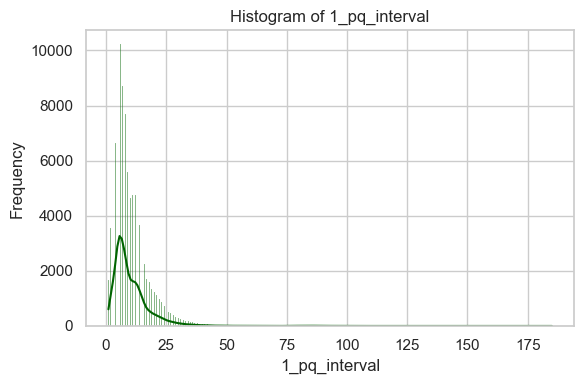

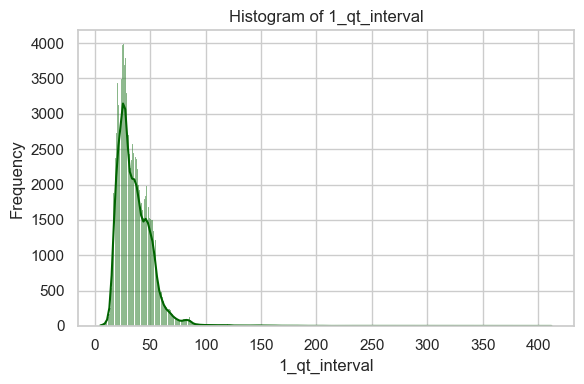

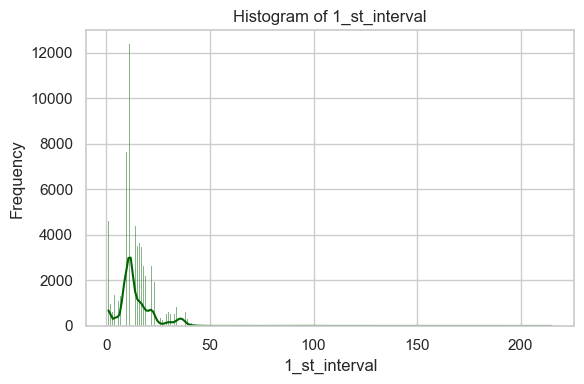

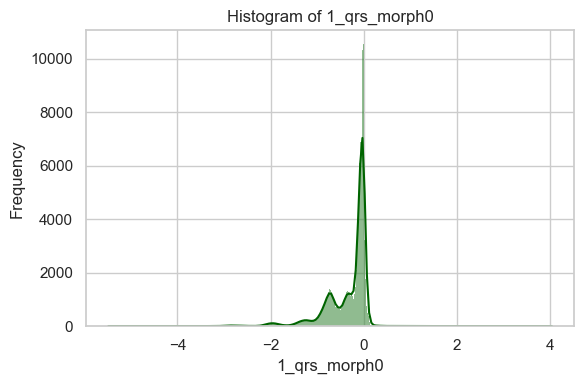

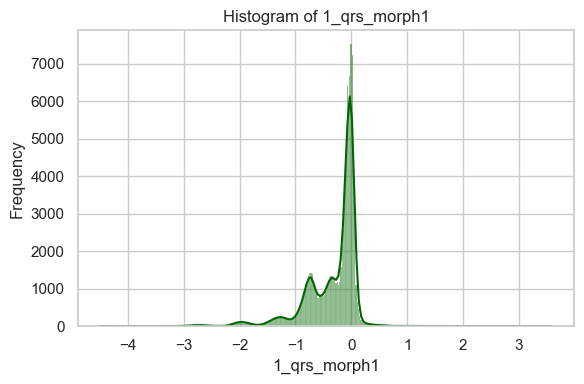

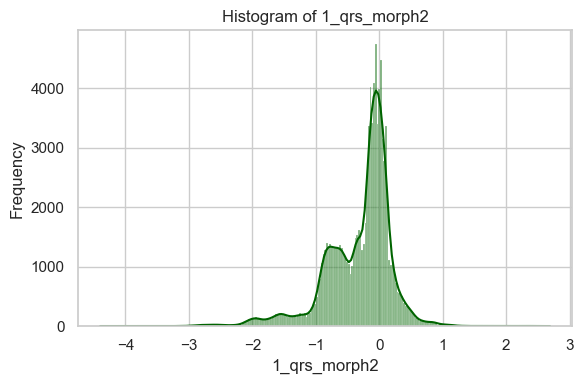

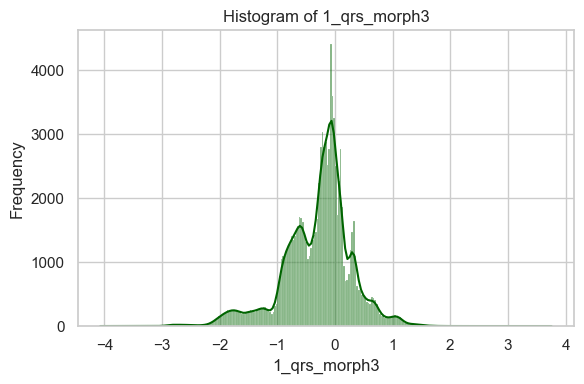

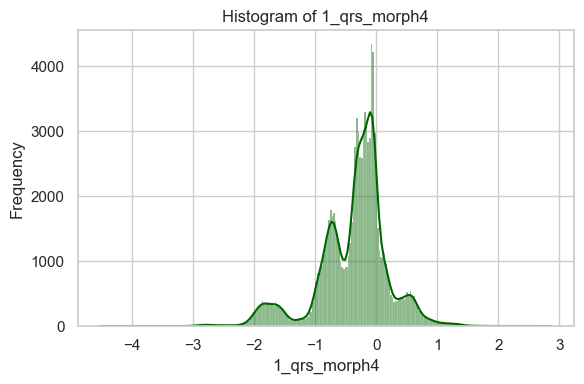

In [216]:
# # 1.2) Histogram for distributions
# List of features you want to plot (excluding 'record' and 'type')
features = ['0_pre-RR', '0_post-RR', '0_pPeak', '0_tPeak', '0_rPeak', '0_sPeak', '0_qPeak',
            '0_qrs_interval', '0_pq_interval', '0_qt_interval', '0_st_interval',
            '0_qrs_morph0', '0_qrs_morph1', '0_qrs_morph2', '0_qrs_morph3', '0_qrs_morph4',
            '1_pre-RR', '1_post-RR', '1_pPeak', '1_tPeak', '1_rPeak', '1_sPeak', '1_qPeak',
            '1_qrs_interval', '1_pq_interval', '1_qt_interval', '1_st_interval',
            '1_qrs_morph0', '1_qrs_morph1', '1_qrs_morph2', '1_qrs_morph3', '1_qrs_morph4']

# Loop through each feature and plot histogram
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=feature, kde=True, color="darkgreen")
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


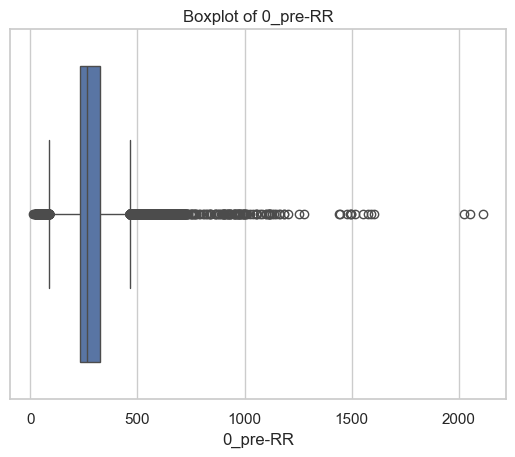

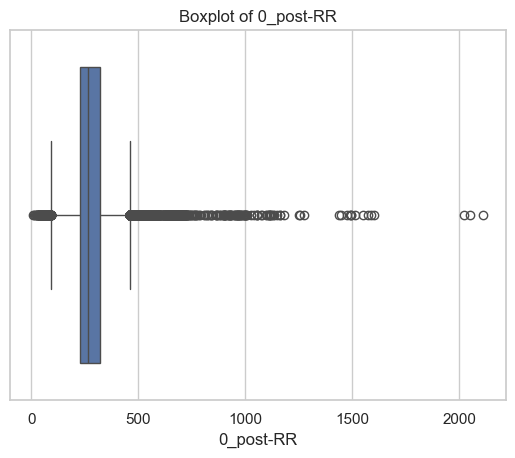

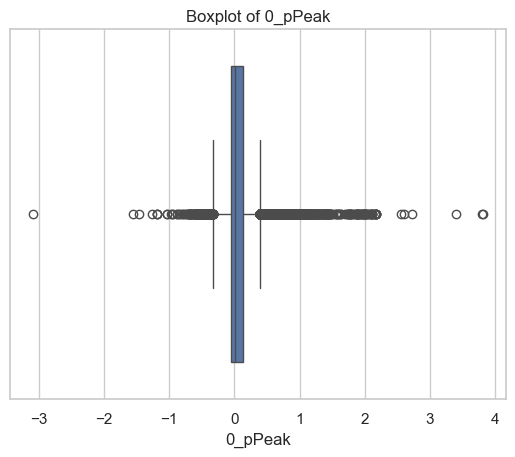

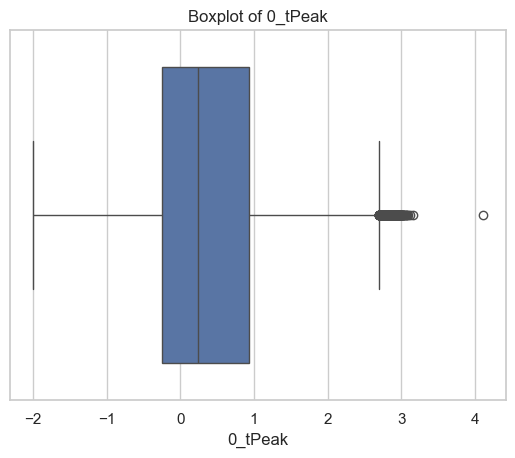

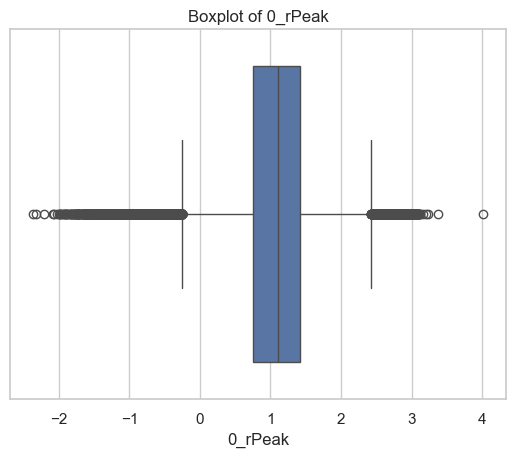

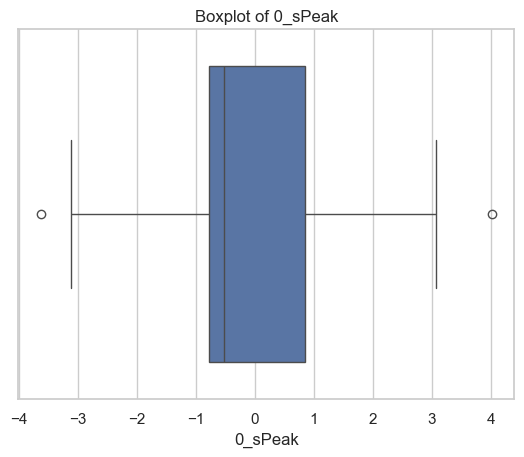

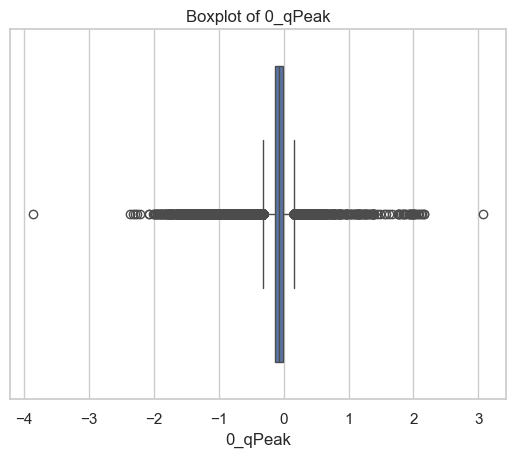

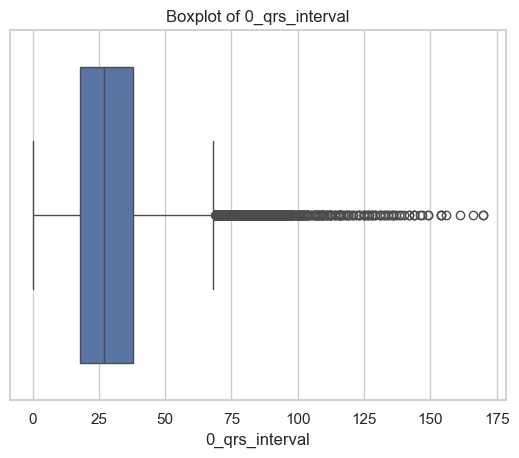

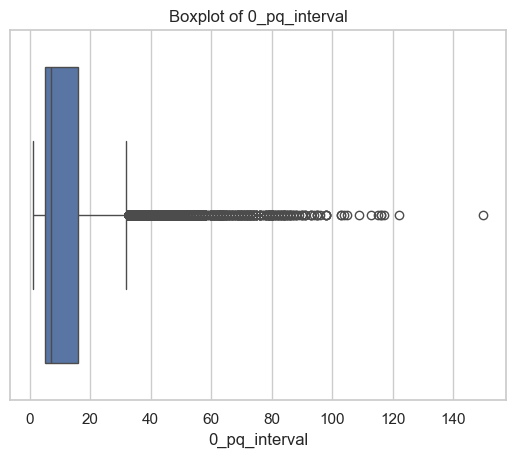

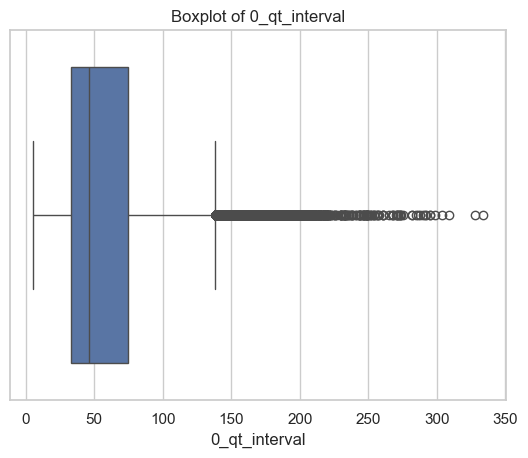

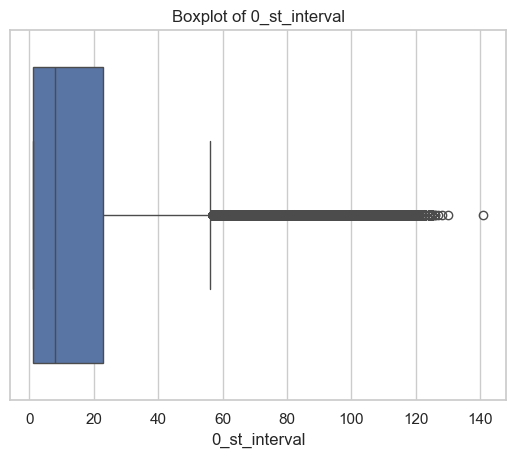

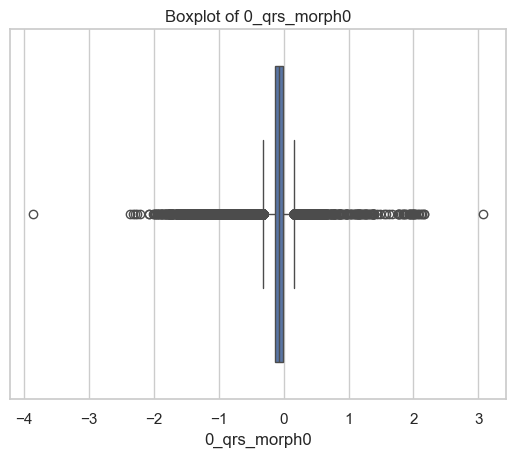

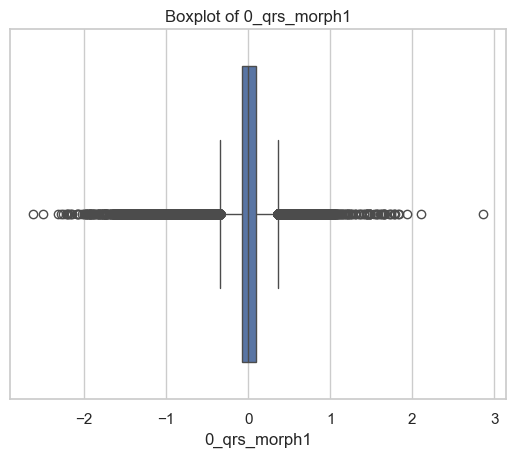

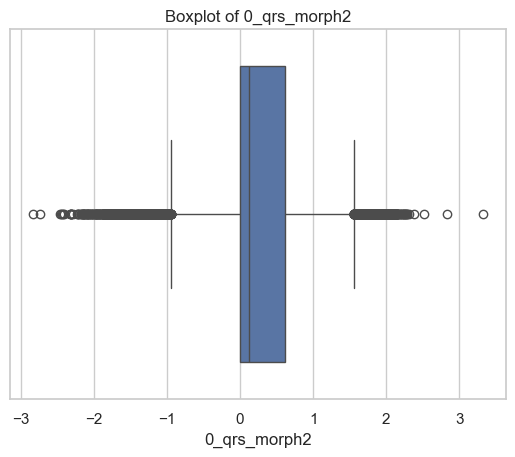

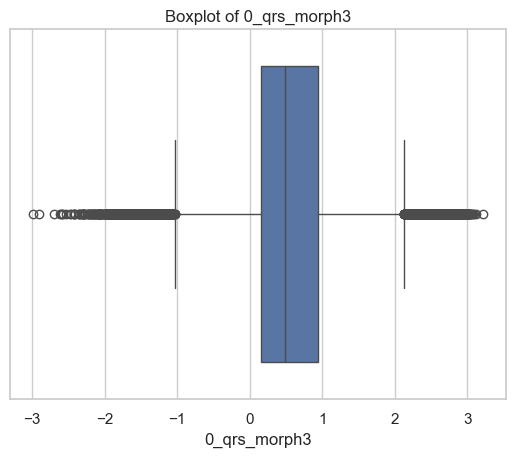

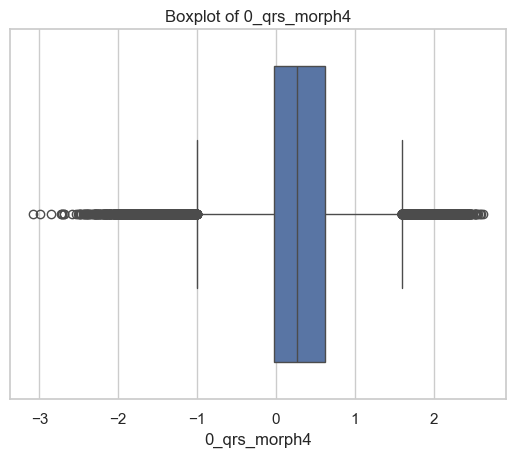

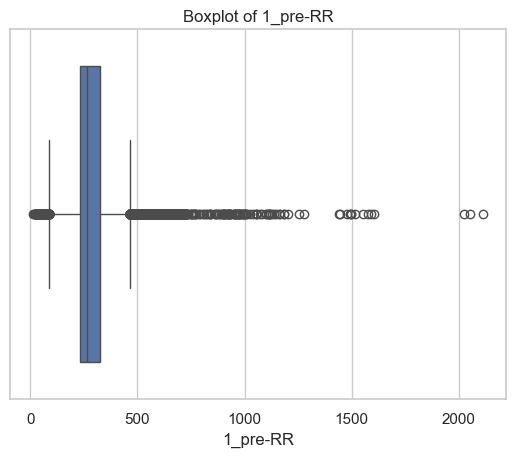

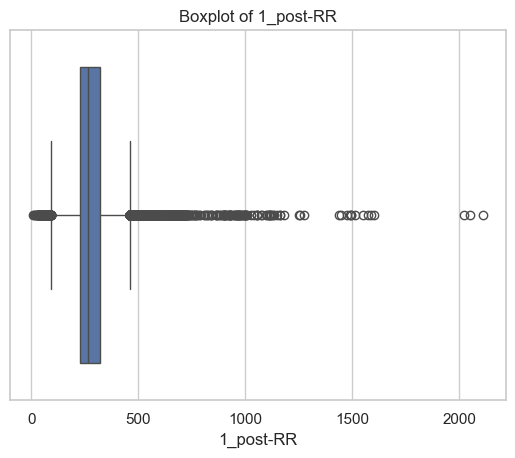

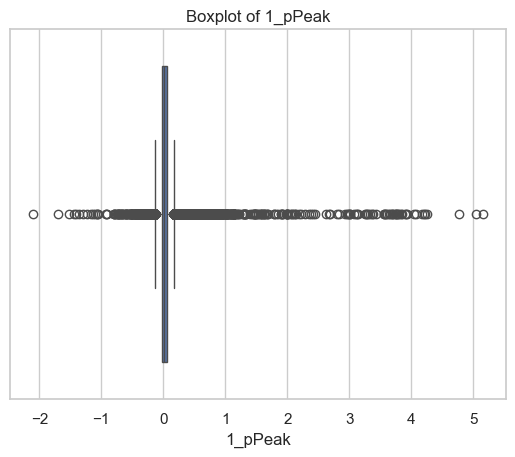

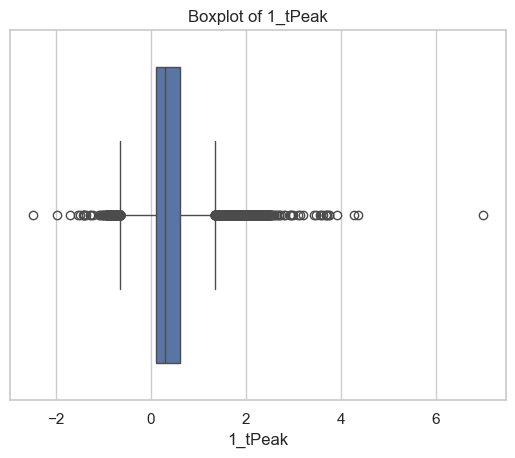

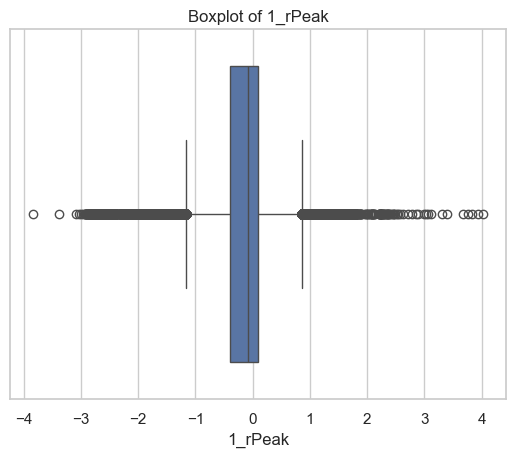

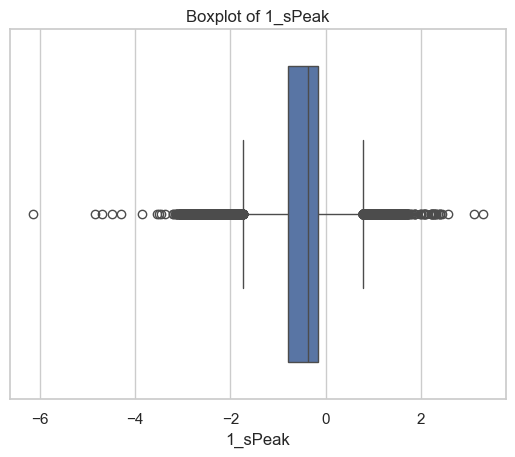

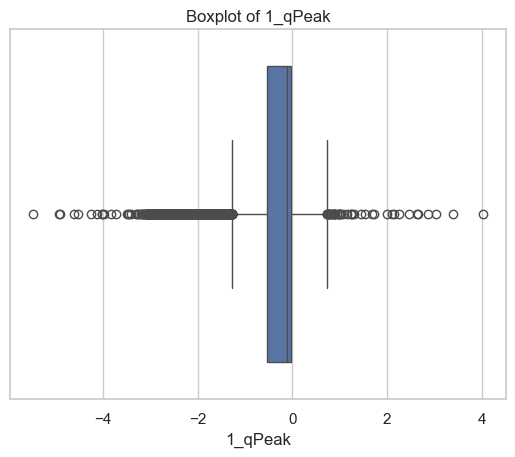

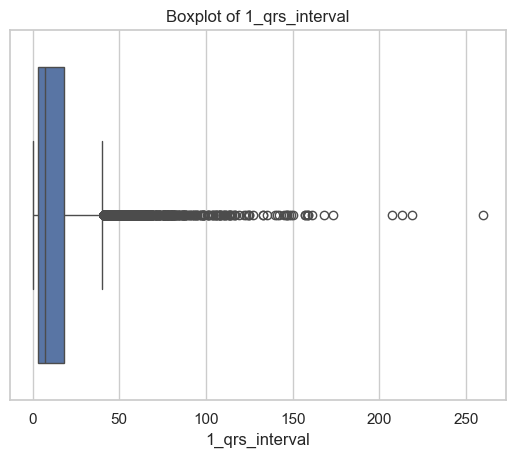

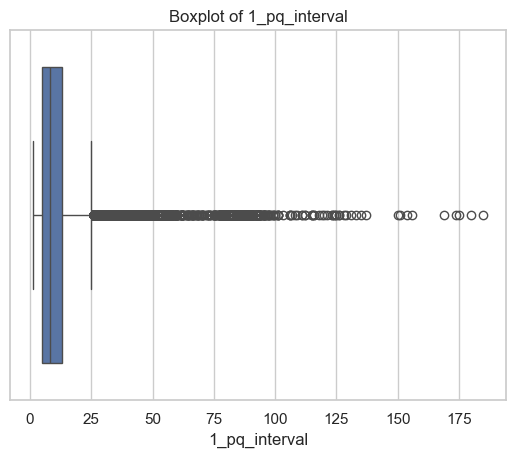

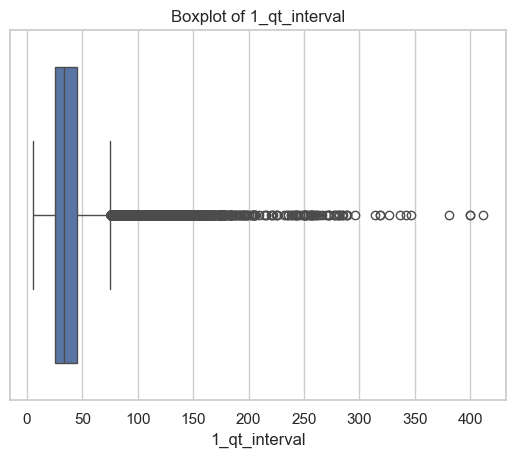

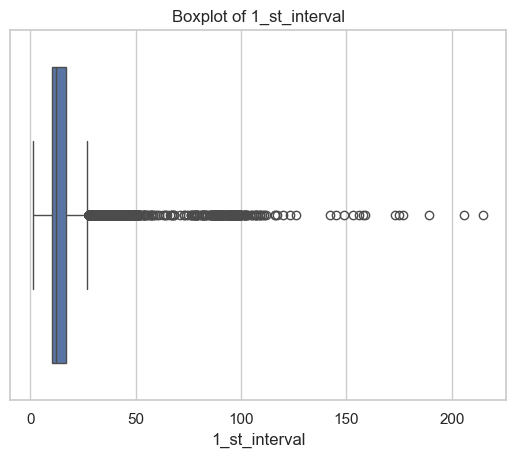

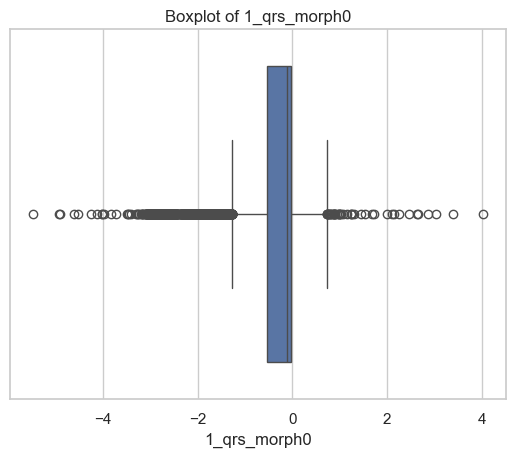

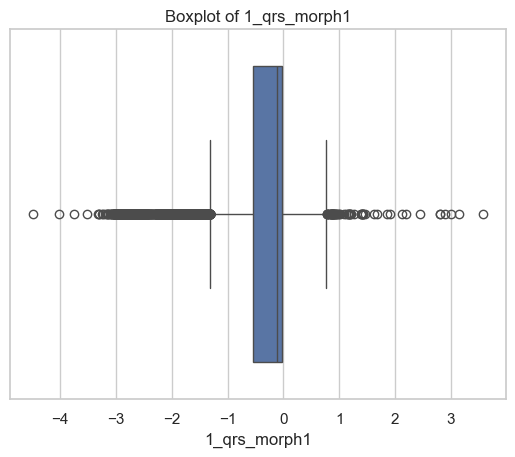

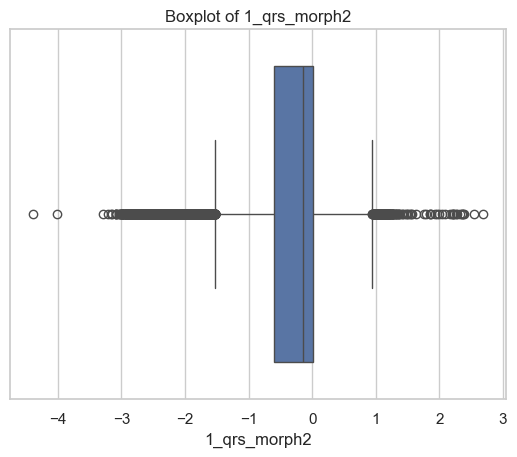

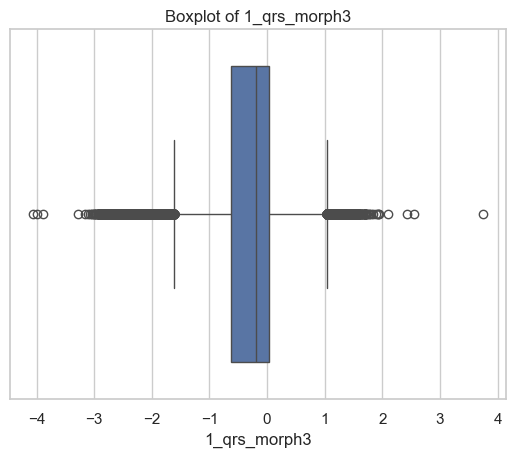

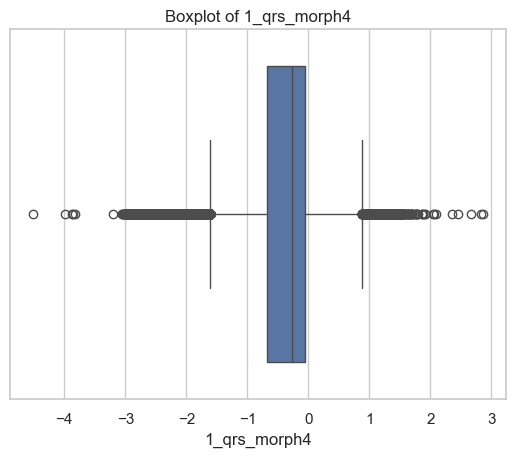

In [217]:
# # 1.3) Boxplots to show outliers
for feature in features:
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()



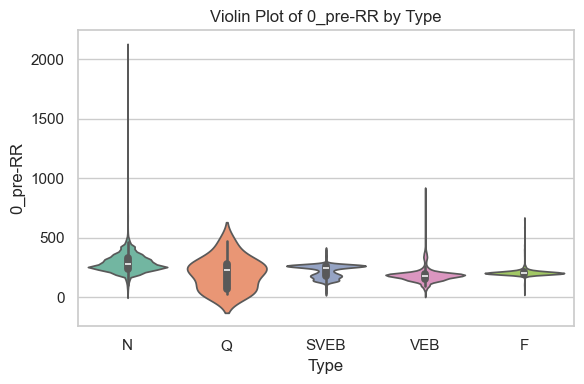

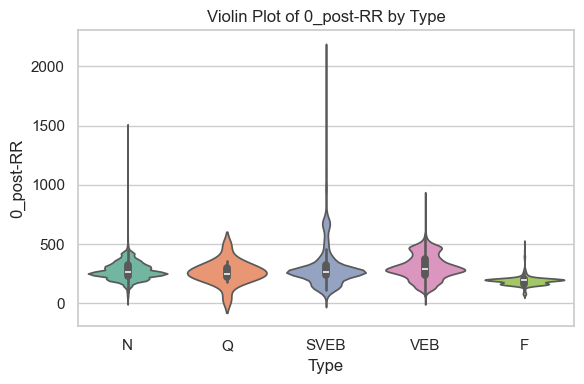

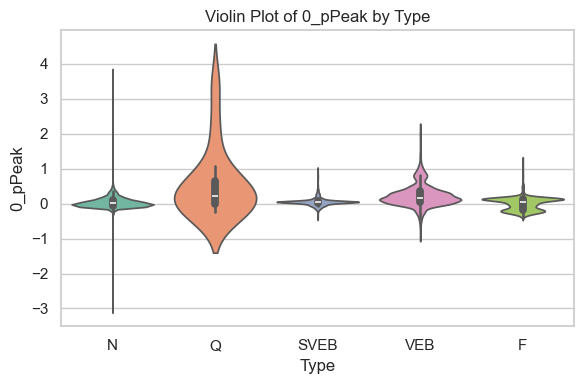

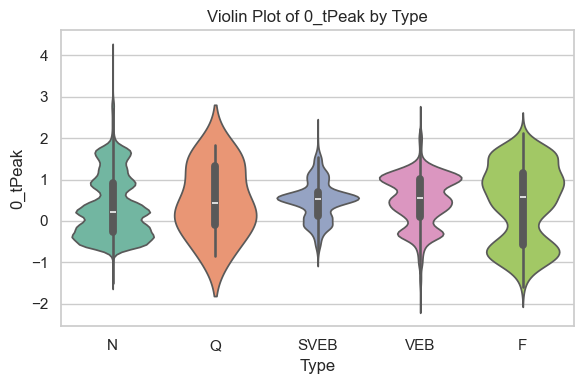

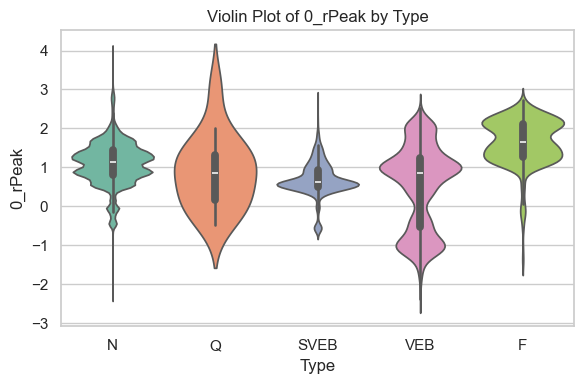

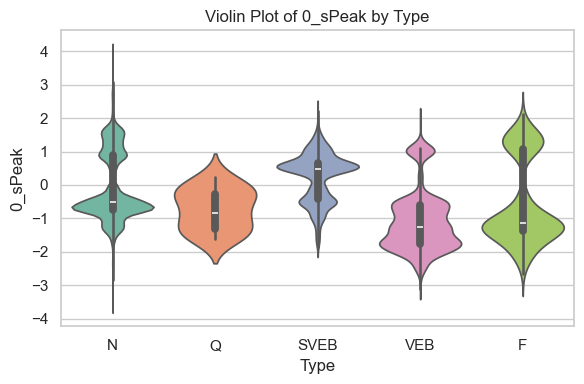

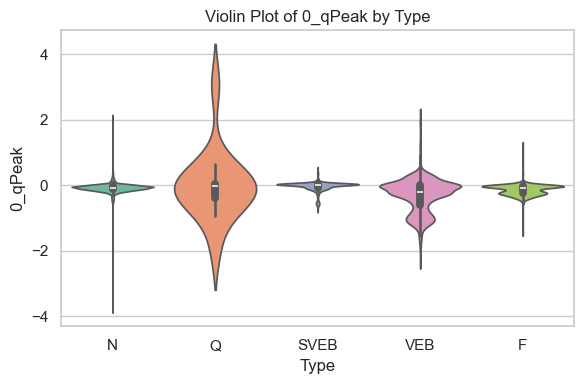

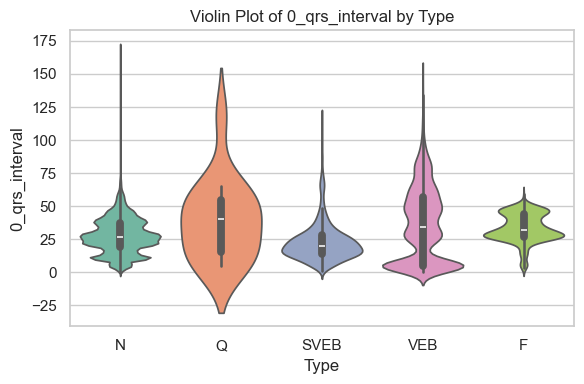

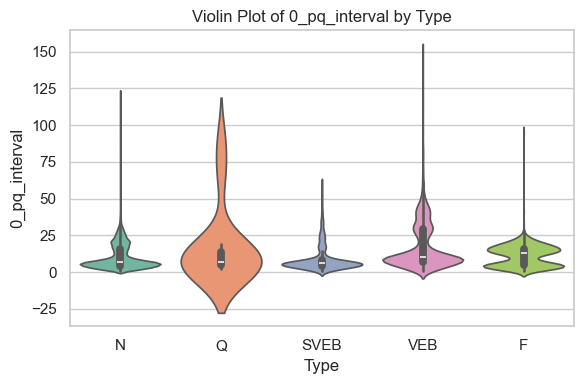

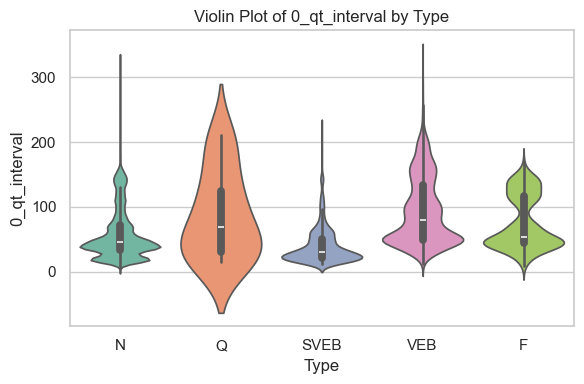

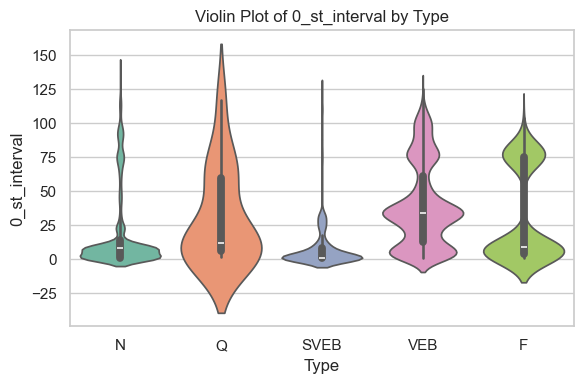

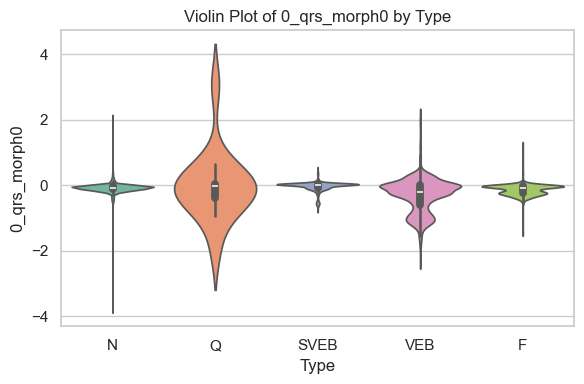

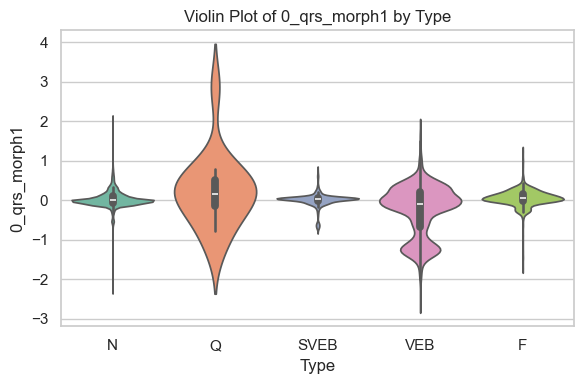

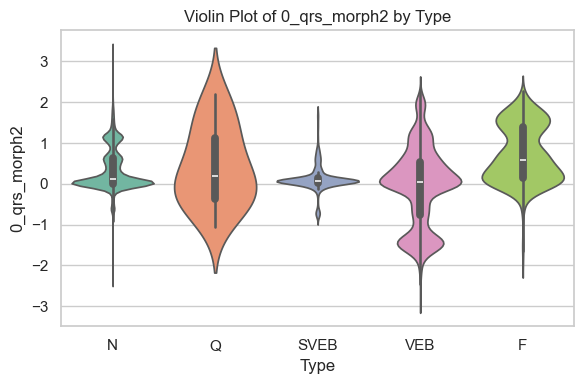

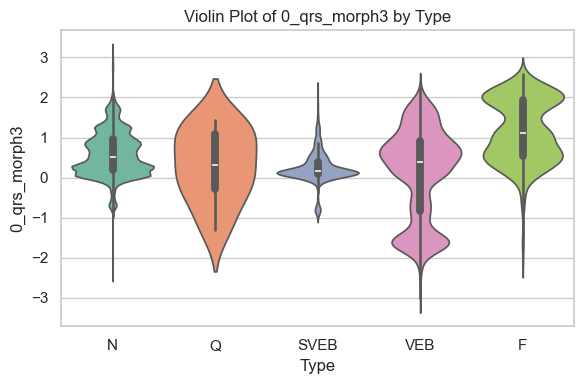

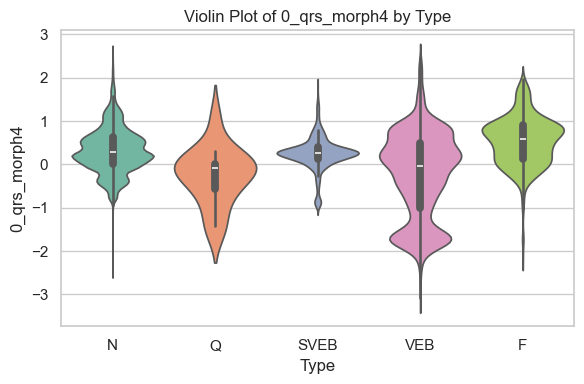

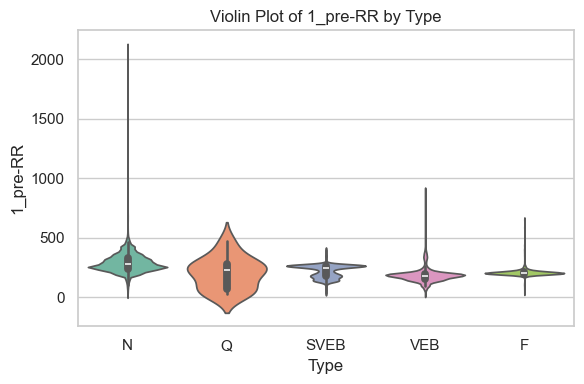

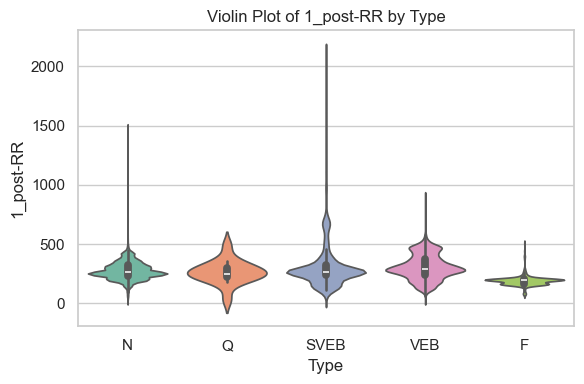

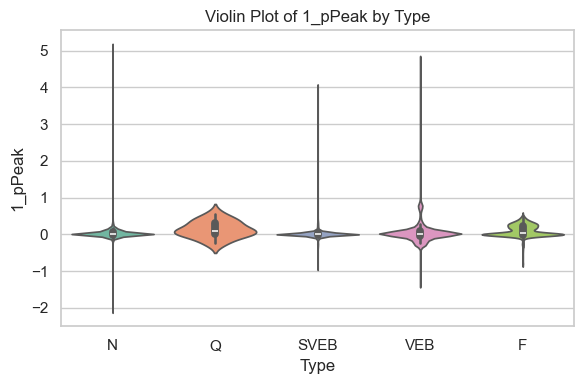

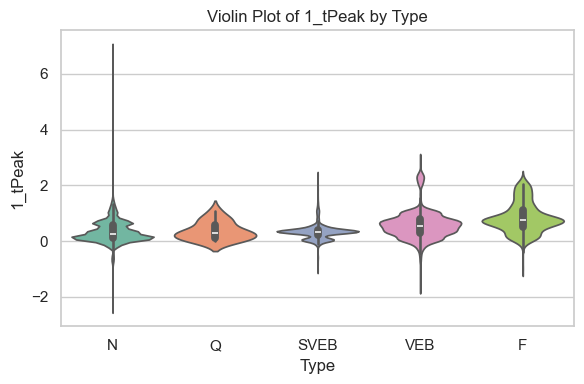

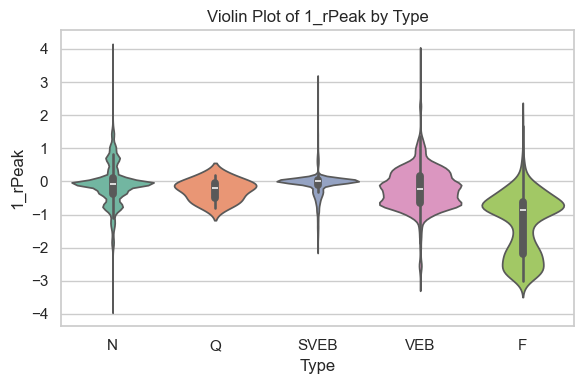

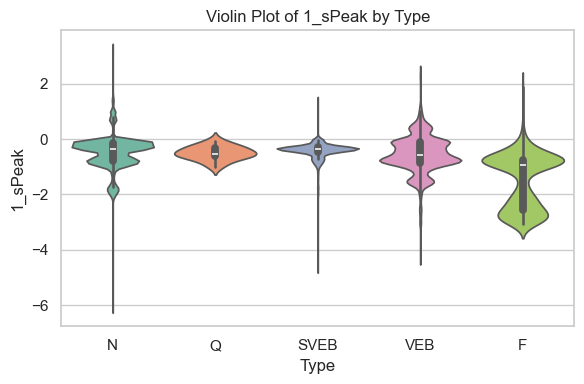

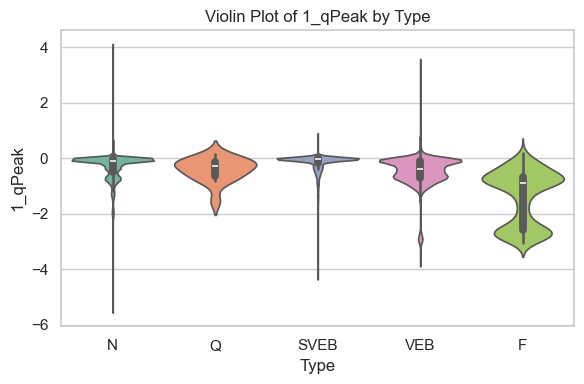

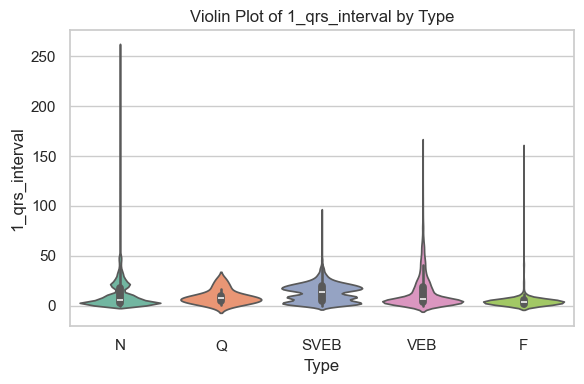

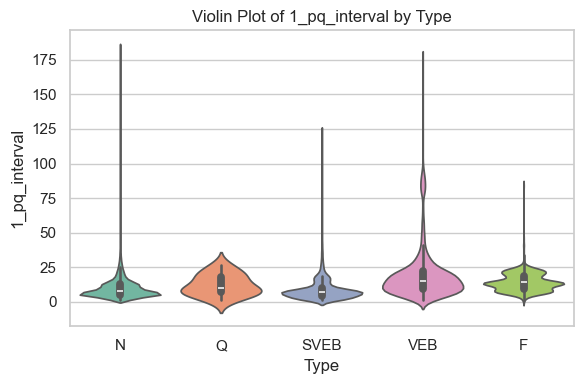

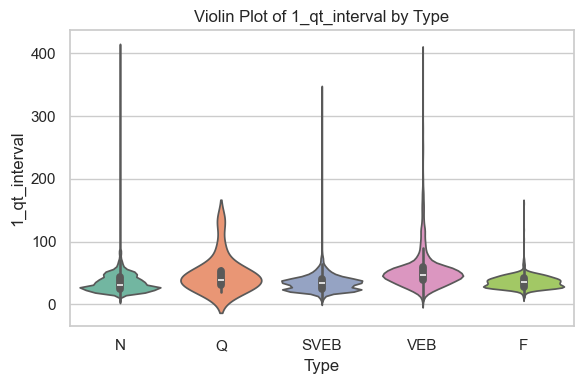

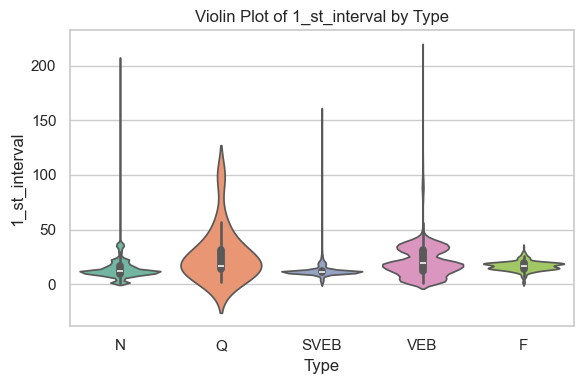

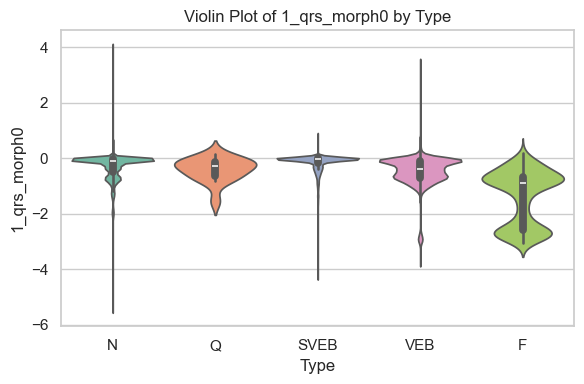

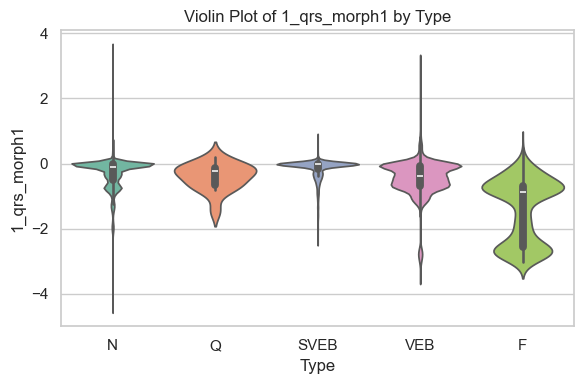

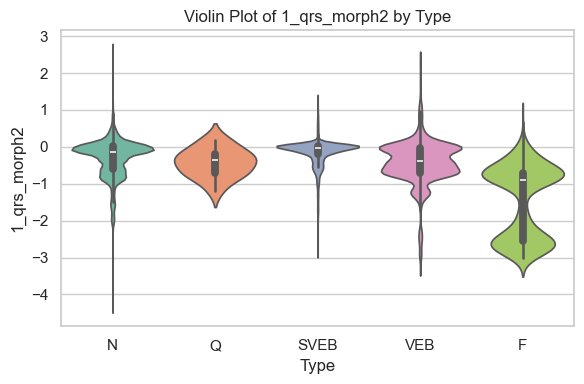

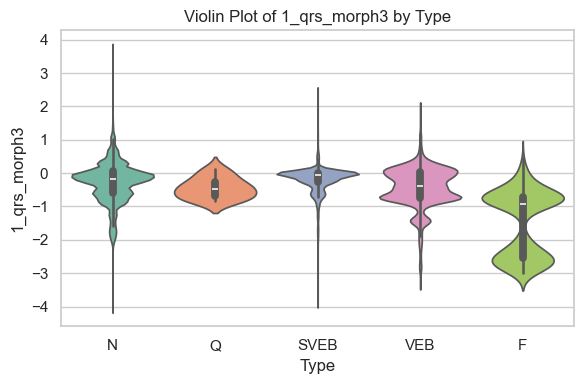

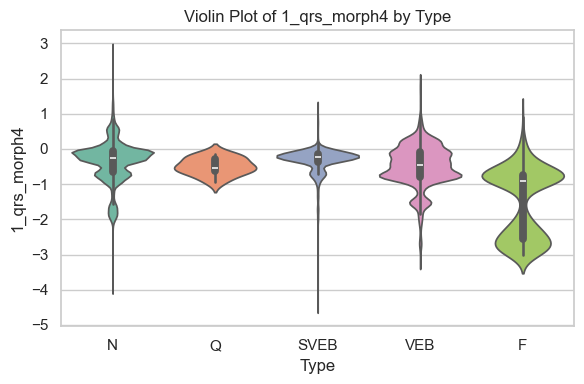

In [218]:
#1.4)Loop through features and plot violin plots
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.violinplot(data=df, x='type', y=feature, hue='type', palette="Set2", legend=False)
    plt.title(f'Violin Plot of {feature} by Type')
    plt.xlabel('Type')
    plt.ylabel(feature)
    plt.tight_layout()
    plt.show()


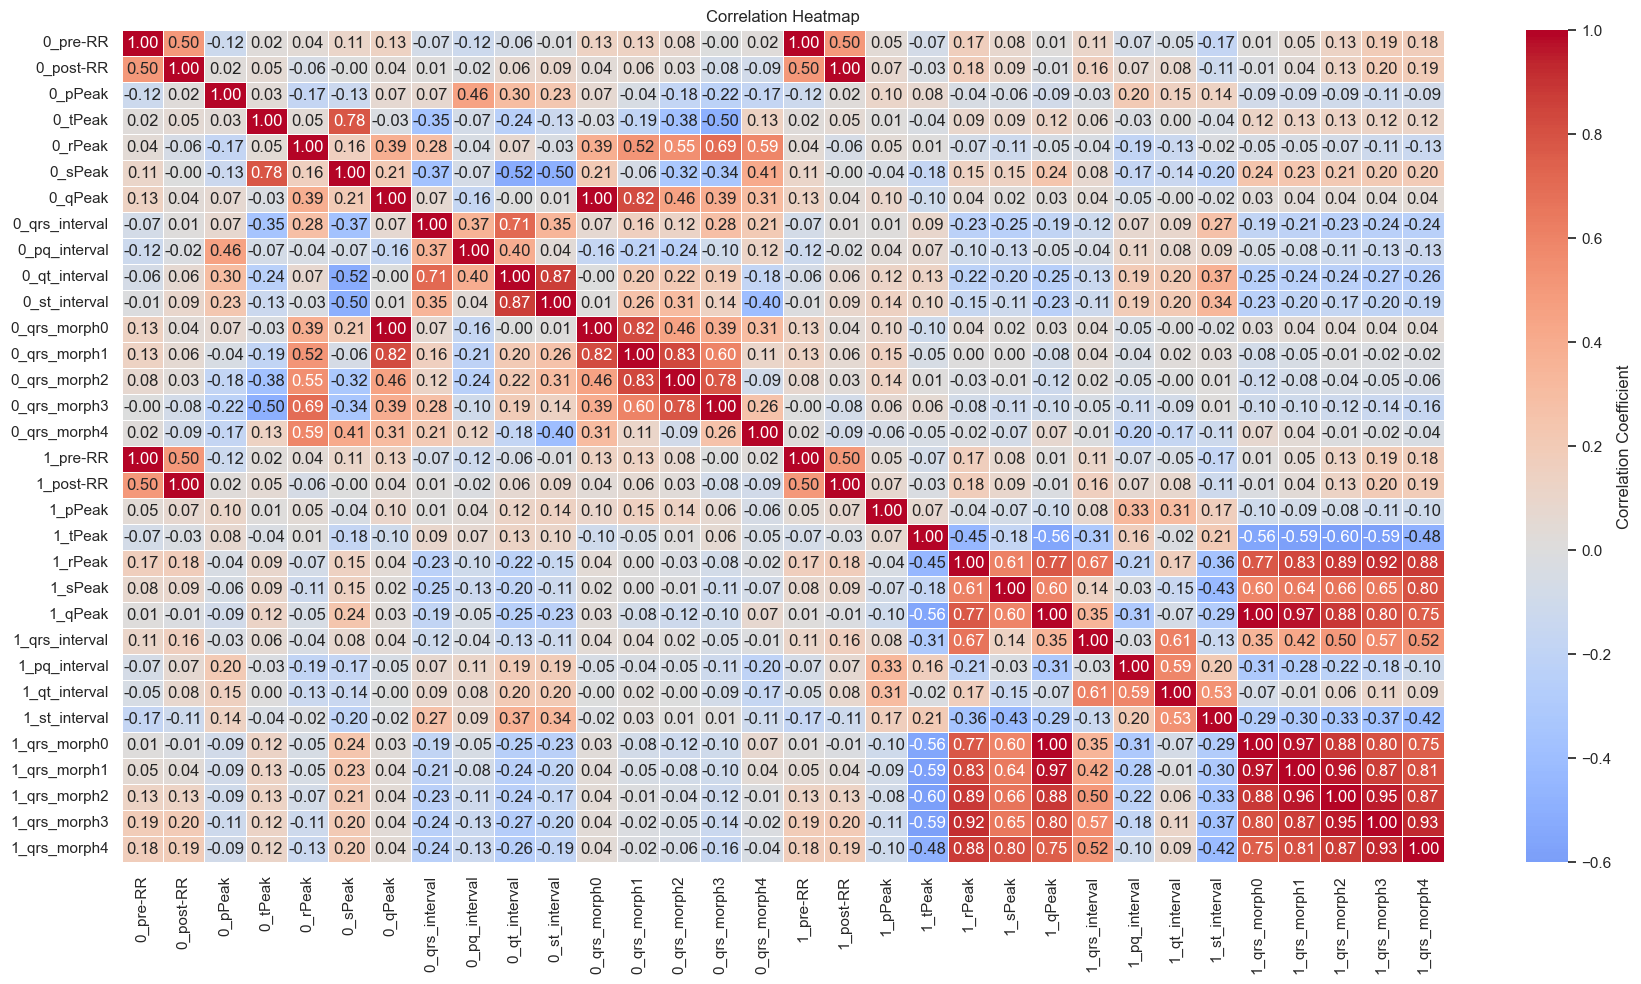

In [219]:
#1.5)using correlation 
new_df_without_record = df.drop(columns=["record"])
v=(new_df_without_record.corr(numeric_only=True))

#1.9)using heatmap
plt.figure(figsize=(18,10))
sns.heatmap(
    v,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",   # Matching your image's color palette
    center=0,
    vmin=-0.6, vmax=1.0,
    linewidths=0.5,
    square=False,
    cbar_kws={'label': 'Correlation Coefficient'}
)

plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

In [220]:
#2)Data preprocessing
#2.1)
df.isnull().sum().sum()


np.int64(0)

In [221]:
# 2.2)
df.duplicated()
df.duplicated().sum()

np.int64(0)

In [222]:
#2.3)Spliting insurance data into training and test training data set:

from sklearn.model_selection import train_test_split
#To gat x  and y features we will need to slice our dataframe

x= df.drop(columns=["record","type"],axis="columns")
pd.set_option('future.no_silent_downcasting', True)
y = df["type"].replace({"N": 1, "Q": 2, "SVEB": 3, "VEB": 4, "F": 5}) #we can do label encoding for y

# x.shape
# x.columns
# y.shape
# y.columns

#2.4)remove the outliers 
#without reducing our data too much , first e will determined the lower and the upper threshold values for outliers
def outliers_thresholds (dataframe , col_name ,q1=0.25 , q3=0.75):  # from boxplot you can understand (0.05 and 0.095)
    quartile1 = dataframe [col_name].quantile(q1)
    quartile3 = dataframe [col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    upper_limit = quartile3 +1.5*  interquantile_range
    lower_limit = quartile1 -1.5*  interquantile_range
    return lower_limit , upper_limit


#check if there outliers according to the threshold values we have determined
def check_outliers (dataframe , col_name):
    lower_limit , upper_limit = outliers_thresholds(dataframe , col_name)
    if dataframe[(dataframe[col_name]>upper_limit) | (dataframe[col_name]<lower_limit)].any(axis=None):
        return True 
    else :
        return False 
    
# Loop through the arrhythmia features and check for outliers
for feature in x.keys():
    print(f"{feature}: {'Outliers found' if check_outliers(df, feature) else 'No outliers'}")

    
#let's suppress the variables with outliers with the threshold value we determned
def replace_with_thresholds(dataframe , variable):
    lower_limit , upper_limit = outliers_thresholds(dataframe , variable)
    dataframe[variable] = dataframe[variable].astype(float)
    dataframe.loc[(dataframe[variable]<lower_limit),variable]=lower_limit 
    dataframe.loc[(dataframe[variable]>upper_limit),variable]=upper_limit 
for feature in x.keys() :
    (feature,replace_with_thresholds(df,feature))

    # #checked again and we have solved the outlier problem finallllly
for feature in x.keys():
    if check_outliers(df, feature):  # still has outliers after capping
        print(f"{feature}: Still has outliers")
    else:
        print(f"{feature}: Outliers capped")


0_pre-RR: Outliers found
0_post-RR: Outliers found
0_pPeak: Outliers found
0_tPeak: Outliers found
0_rPeak: Outliers found
0_sPeak: Outliers found
0_qPeak: Outliers found
0_qrs_interval: Outliers found
0_pq_interval: Outliers found
0_qt_interval: Outliers found
0_st_interval: Outliers found
0_qrs_morph0: Outliers found
0_qrs_morph1: Outliers found
0_qrs_morph2: Outliers found
0_qrs_morph3: Outliers found
0_qrs_morph4: Outliers found
1_pre-RR: Outliers found
1_post-RR: Outliers found
1_pPeak: Outliers found
1_tPeak: Outliers found
1_rPeak: Outliers found
1_sPeak: Outliers found
1_qPeak: Outliers found
1_qrs_interval: Outliers found
1_pq_interval: Outliers found
1_qt_interval: Outliers found
1_st_interval: Outliers found
1_qrs_morph0: Outliers found
1_qrs_morph1: Outliers found
1_qrs_morph2: Outliers found
1_qrs_morph3: Outliers found
1_qrs_morph4: Outliers found
0_pre-RR: Outliers capped
0_post-RR: Outliers capped
0_pPeak: Outliers capped
0_tPeak: Outliers capped
0_rPeak: Outliers cappe

In [223]:
# #2.5) Scaling for x  x.head after scaling will give error because it turns to array'numpy.ndarray' object has no attribute 'head'
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x=scaler.fit_transform(x)


In [224]:
df

record type  0_pre-RR  0_post-RR   0_pPeak   0_tPeak   0_rPeak  \
0          101    N      89.0      313.0  0.074347 -0.160548  1.036401   
1          101    N     313.0      315.0 -0.052079 -0.264784  0.886597   
2          101    N     315.0      321.0 -0.062151 -0.296983  0.991859   
3          101    N     321.0      336.0 -0.063322 -0.281386  1.034903   
4          101    N     336.0      344.0 -0.062915  1.046914  1.046408   
...        ...  ...       ...        ...       ...       ...       ...   
100684     234    N     240.0      241.0 -0.110230  1.420339  1.403346   
100685     234    N     241.0      243.0 -0.119014  1.424782  1.420328   
100686     234    N     243.0      252.0  0.173524 -0.443214  1.436878   
100687     234    N     252.0      244.0 -0.119820 -0.401522  1.337051   
100688     234    N     244.0      236.0  0.162909  1.416672  1.409440   

         0_sPeak   0_qPeak  0_qrs_interval  ...   1_qPeak  1_qrs_interval  \
0      -0.285662 -0.026824            41.0  ...  0.025930             2.0   
1      -0.366298 -0.059710            21.0  ... -0.042009            26.0   
2      -0.410306 -0.065686            22.0  ...  0.009528             3.0   
3      -0.403880 -0.071750            22.0  ... -0.020536             6.0   
4       1.046408 -0.074639            11.0  ...  0.016053            16.0   
...          ...       ...             ...  ...       ...             ...   
100684  1.403346 -0.115682            14.0  ... -0.069234             5.0   
100685  1.420328 -0.134406            13.0  ... -0.069530             7.0   
100686 -0.714642 -0.136431            38.0  ... -0.089396             9.0   
100687 -0.688560 -0.125076            27.0  ... -0.065487             3.0   
100688  1.409440 -0.118397            28.0  ... -0.078260             5.0   

        1_pq_interval  1_qt_interval  1_st_interval  1_qrs_morph0  \
0                18.0           22.0            2.0      0.025930   
1                25.0           62.0            9.0     -0.042009   
2                 8.0           12.0            1.0      0.009528   
3                 9.0           16.0            1.0     -0.020536   
4                 5.0           31.0           10.0      0.016053   
...               ...            ...            ...           ...   
100684            6.0           20.0            9.0     -0.069234   
100685            5.0           20.0            8.0     -0.069530   
100686            7.0           24.0            8.0     -0.089396   
100687            1.0           12.0            8.0     -0.065487   
100688            8.0           21.0            8.0     -0.078260   

        1_qrs_morph1  1_qrs_morph2  1_qrs_morph3  1_qrs_morph4  
0           0.025930      0.025930      0.025436      0.025436  
1          -0.029498      0.005012      0.030892      0.002986  
2           0.009528      0.008786      0.008786      0.008368  
3          -0.020257     -0.018965     -0.016968     -0.014555  
4           0.006742      0.002782     -0.007798     -0.051155  
...              ...           ...           ...           ...  
100684     -0.068378     -0.065373     -0.060779     -0.054383  
100685     -0.069290     -0.066317     -0.053437     -0.045120  
100686     -0.088155     -0.078611     -0.066763     -0.058650  
100687     -0.065487     -0.064941     -0.064941     -0.061120  
100688     -0.077918     -0.075665     -0.070433     -0.060190  

[100689 rows x 34 columns]

In [225]:
x

array([[-2.48307188,  0.42418464,  0.14559795, ...,  0.64616332,
         0.53984272,  0.67058913],
       [ 0.41016949,  0.44883809, -0.60342565, ...,  0.60578357,
         0.54903576,  0.63220618],
       [ 0.43458503,  0.52279843, -0.6631009 , ...,  0.61306792,
         0.51178411,  0.64140894],
       ...,
       [-0.44437438, -0.32774547,  0.7331842 , ...,  0.44436203,
         0.38447393,  0.52682994],
       [-0.33450445, -0.42635926, -1.00476392, ...,  0.47074965,
         0.38754452,  0.52260666],
       [-0.43216661, -0.52497304,  0.67028883, ...,  0.45004908,
         0.37829003,  0.52419671]], shape=(100689, 32))

In [226]:
#2.6)Use split function to split our train and test data
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.25)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(75516, 32)
(25173, 32)
(75516,)
(25173,)


In [227]:
#3)Initate ML model
#3.1)Logistic Model 

from sklearn.preprocessing import LabelEncoder
# Create encoder
le = LabelEncoder()

#4.1)Fit Logistic Model
# Fit and transform y labels
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(max_iter=1000)  # increase iterations for convergence
model1.fit(x_train, y_train_encoded)

#5.1)prediction
test_pred_encoded_log = model1.predict(x_test)
# Convert back to original labels
test_pred_labels_log = le.inverse_transform(test_pred_encoded_log)

In [228]:
#prediction results
test_pred_labels_log[:425]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 4, 4, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 4, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4,
       1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1,
       1, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1,
       1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 4, 4, 1, 1, 4,
       4, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [229]:
y_test[:425]

34472    1
59902    1
95010    1
81713    1
62879    1
        ..
90254    1
31146    1
87929    1
63560    1
44581    3
Name: type, Length: 425, dtype: object

In [230]:
#3.2)Decision Tree 
model2=DecisionTreeClassifier()

#4.2)Fit Model
model2.fit(x_train , y_train_encoded)

#5.2)prediction
train_pred_encoded_tree= model2.predict(x_train)
test_pred_encoded_tree= model2.predict(x_test)

# Convert back to original labels
train_pred_labels_tree = le.inverse_transform(train_pred_encoded_tree)
test_pred_labels_tree = le.inverse_transform(test_pred_encoded_tree)

In [231]:
#prediction results
test_pred_labels_tree[:425]

array([1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 4, 4, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 4, 1, 1, 4, 1, 4, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 4,
       1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 4, 1, 1, 1, 1, 1,
       1, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 4, 1, 1, 1,
       1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 3, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 4, 4, 1, 3, 4,
       4, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [232]:
# from sklearn.metrics import classification_report, accuracy_score

# print("Train Accuracy:", accuracy_score(y_train_encoded, train_pred_encoded_tree))
# print("Test Accuracy:", accuracy_score(y_test_encoded, test_pred_encoded_tree))
# target_names = [str(cls) for cls in le.classes_]
# print("\nClassification Report:\n", classification_report(y_test_encoded, test_pred_encoded_tree, target_names=target_names))


In [233]:
#for practice
print("Number of features model2 was trained on:", model2.n_features_in_)
print("Number of feature names provided:", len(features))

Number of features model2 was trained on: 32
Number of feature names provided: 32


In [234]:
# import matplotlib.pyplot as plt
# from sklearn.tree import plot_tree

# plt.figure(figsize=(15, 10))
# # Assuming you still have the original DataFrame
# class_names = [str(cls) for cls in le.classes_]
# plot_tree(model2, feature_names=features , class_names=class_names, filled=True)
# plt.show()

In [235]:
#3.3)Random Forest
model3=RandomForestClassifier()

#4.3)Fit Model
model3.fit(x_train , y_train_encoded)

#5.3)prediction
train_pred_encoded_random = model3.predict(x_train)
test_pred_encoded_random = model3.predict(x_test)


# Convert back to original labels
train_pred_labels_random = le.inverse_transform(train_pred_encoded_random)
test_pred_labels_random = le.inverse_transform(test_pred_encoded_random)

In [236]:
#prediction results
test_pred_labels_random[:425]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 4, 4, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 4, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 4,
       1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1,
       1, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 4, 1, 1, 1,
       1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 4, 4, 1, 3, 4,
       4, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [237]:
#3.4)Naive Bayes 
model4=GaussianNB()

#4.4)Fit Model
model4.fit(x_train , y_train_encoded)

#5.4)prediction
train_pred_encoded_NB = model4.predict(x_train)
test_pred_encoded_NB = model4.predict(x_test)

# Convert back to original labels
train_pred_labels_NB = le.inverse_transform(train_pred_encoded_NB)
test_pred_labels_NB= le.inverse_transform(test_pred_encoded_NB)

In [238]:
#prediction results
test_pred_labels_NB[:425]

array([2, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 4, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 3, 5, 1, 1, 5, 1, 4, 3, 1, 1, 3, 1, 1, 1, 1, 1, 3,
       1, 1, 3, 1, 4, 4, 4, 1, 3, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3, 4, 1, 1, 3, 1, 1, 1, 3, 2, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 2,
       1, 5, 1, 5, 3, 1, 4, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 4,
       1, 1, 1, 1, 4, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 3, 3, 5, 1,
       3, 1, 1, 5, 1, 1, 1, 3, 4, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1,
       1, 1, 4, 1, 1, 1, 1, 3, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 5, 4, 1, 1, 1,
       1, 1, 2, 3, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 5, 1, 4, 3, 1, 3, 1,
       1, 1, 1, 1, 1, 1, 1, 5, 3, 1, 1, 3, 3, 3, 1, 1, 1, 4, 4, 1, 1, 4,
       1, 3, 1, 1, 1, 1, 4, 1, 3, 1, 1, 1, 1, 1, 5, 1, 1, 1, 3, 1, 3, 1,
       1, 1, 1, 1, 1, 1, 4, 1, 3, 1, 3, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1,
       1, 1, 3, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1,

In [239]:
#3.5)Knn
model5=KNeighborsClassifier(n_neighbors=25)

#4.5)Fit Model
model5.fit(x_train , y_train_encoded)

#5.5)prediction
train_pred_encoded_Knn = model5.predict(x_test)
test_pred_encoded_Knn = model5.predict(x_test)

# Convert back to original labels
train_pred_labels_Knn = le.inverse_transform(train_pred_encoded_Knn)
test_pred_labels_Knn= le.inverse_transform(test_pred_encoded_Knn)


#That warning does not affect your model's performance, accuracy, or plots.

In [240]:
#prediction results
test_pred_labels_Knn[:425]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 4, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 4,
       1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1,
       1, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 4, 1, 1, 1,
       1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 1, 3, 4,
       4, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [248]:
# 3.6) Support Vector Machine (SVM)
from sklearn.svm import SVC
model6 = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True)  # You can change kernel to 'linear', 'poly', etc.

# 4.6) Fit SVM Model
model6.fit(x_train, y_train_encoded)

# 5.6) Prediction
train_pred_encoded_SVM = model6.predict(x_train)
test_pred_encoded_SVM = model6.predict(x_test)

# Convert back to original labels
train_pred_labels_SVM = le.inverse_transform(train_pred_encoded_SVM)
test_pred_labels_SVM = le.inverse_transform(test_pred_encoded_SVM)

In [249]:
#prediction results
test_pred_labels_SVM[:425]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 4, 4, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 4, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 4,
       1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1,
       1, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 4, 1, 1, 1,
       1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 4, 4, 1, 3, 4,
       4, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [243]:
# 3.7) Neural Network - MLPClassifier
from sklearn.neural_network import MLPClassifier

model7 = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)

# 4.7) Fit NN Model
model7.fit(x_train, y_train_encoded)

# 5.7) Prediction
train_pred_encoded_NN = model7.predict(x_train)
test_pred_encoded_NN = model7.predict(x_test)

# Convert back to original labels
train_pred_labels_NN = le.inverse_transform(train_pred_encoded_NN)
test_pred_labels_NN = le.inverse_transform(test_pred_encoded_NN)


In [244]:
#prediction results
test_pred_labels_NN[:425]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 4, 4, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 4, 1, 1, 4, 1, 4, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 4,
       1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1,
       1, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 4, 1, 1, 1,
       1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 4, 4, 1, 3, 4,
       4, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [250]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc , matthews_corrcoef, cohen_kappa_score, log_loss

In [ ]:
#7)Evaluation
def evaluation (test_pred , model):
        #1)
            accuracy = metrics.accuracy_score(y_test_encoded, test_pred)
            recall = metrics.recall_score(y_test_encoded, test_pred, average='macro', zero_division=0)  # Use 'macro' for multiclass
            precision = metrics.precision_score(y_test_encoded, test_pred, average='macro',zero_division=0)  # Use 'macro' for multiclass
            f1_score = metrics.f1_score(y_test_encoded, test_pred, average='macro', zero_division=0)  # Use 'macro' for multiclass
            mcc = metrics.matthews_corrcoef(y_test_encoded, test_pred)
            kappa = metrics.cohen_kappa_score(y_test_encoded, test_pred)
            logloss = metrics.log_loss(y_test_encoded, model.predict_proba(x_test))
            balanced_acc = metrics.balanced_accuracy_score(y_test_encoded, test_pred)
            hamming = metrics.hamming_loss(y_test_encoded, test_pred)
            
            print(f'Model Accuracy = {100*accuracy:0.3} %' )
            print(f'Model recall = {100*recall:0.3} %' )
            print(f'Model precision = {100*precision:0.3} %' )
            print(f'Model f1_score = {100*f1_score:0.3} %' )
            print(f"Matthews Correlation Coefficient = {mcc:.3f}")
            print(f"Cohen’s Kappa = {kappa:.3f}")
            print(f"Log Loss = {logloss:.3f}")
            print(f"Balanced Accuracy = {balanced_acc:.3f}")
            print(f"Hamming Loss = {hamming:.3f}")


        #2)    #confusion Matrix
           # New class label mapping (Note: model classes are 0-indexed)
            label_names = ["N", "Q", "SVEB", "VEB", "F"]  # Corresponds to 0 → N, 1 → Q, etc.

            # Compute the confusion matrix
            cm = confusion_matrix(y_test_encoded, test_pred_encoded_log)

            # Create a DataFrame with proper labels
            cm_df = pd.DataFrame(cm, index=label_names, columns=label_names)

            # Plot the confusion matrix using seaborn
            plt.figure(figsize=(6,6))
            ax = sns.heatmap(cm_df, annot=True, cmap="Blues", fmt="d", linewidths=0.5)
            ax.set_title('Confusion Matrix')
            ax.set_xlabel('Predicted Values')
            ax.set_ylabel('True Values')
            plt.show()
            
        #3)  #class_report
            class_report = metrics.classification_report(y_test_encoded,test_pred, zero_division=0)
            print(class_report)
            
        #4)   #Roc_curve 
        #5)   #AUC
            # One-hot encode your multi-class labels
           # Define your class mapping
            class_map = {1: "N", 2: "Q", 3: "SVEB", 4: "VEB", 5: "F"}

            # Replace the list of class labels with the keys from your mapping
            classes = list(class_map.keys())
            y_test_bin = label_binarize(y_test_encoded, classes=classes)
            n_classes = y_test_bin.shape[1]
            y_score = model.predict_proba(x_test)

            # Plot ROC curve for each class
            plt.figure(figsize=(8, 6))

            for i in range(n_classes):
                if y_test_bin[:, i].sum() == 0:
                    print(f"Skipping class {class_map[classes[i]]} due to no positive samples in y_true.")
                    continue
                fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
                roc_auc = auc(fpr, tpr)
                class_label = class_map[classes[i]]
                plt.plot(fpr, tpr, label=f'Class {class_label} (AUC = {roc_auc:.2f})')

            plt.plot([0, 1], [0, 1], 'k--')
            plt.title('Multiclass ROC Curve (One-vs-Rest)')
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.legend(loc='lower right')
            plt.grid()
            plt.show()
            return accuracy ,recall,precision , f1_score

In [258]:
test_pred_labels_log[:425]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 4, 4, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 4, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4,
       1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1,
       1, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1,
       1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 4, 4, 1, 1, 4,
       4, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [259]:
test_pred_encoded_log[:425]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,
       0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0,
       0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 3, 3, 0, 0, 3,
       3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Model Accuracy = 94.8 %
Model recall = 44.4 %
Model precision = 61.2 %
Model f1_score = 48.8 %
Matthews Correlation Coefficient = 0.700
Cohen’s Kappa = 0.689
Log Loss = 0.167
Balanced Accuracy = 0.444
Hamming Loss = 0.052


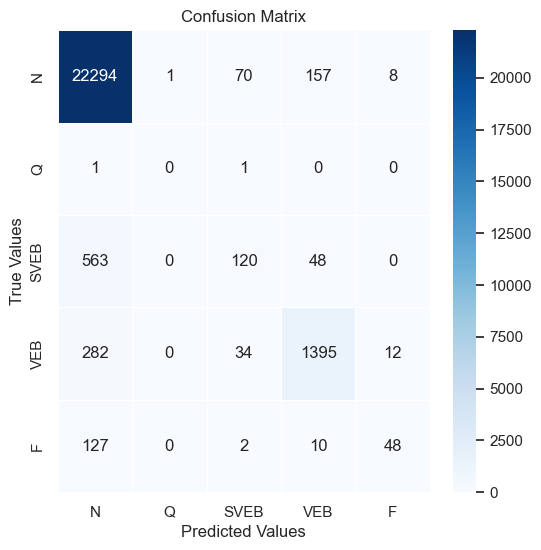

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     22530
           1       0.00      0.00      0.00         2
           2       0.53      0.16      0.25       731
           3       0.87      0.81      0.84      1723
           4       0.71      0.26      0.38       187

    accuracy                           0.95     25173
   macro avg       0.61      0.44      0.49     25173
weighted avg       0.94      0.95      0.94     25173

Skipping class F due to no positive samples in y_true.


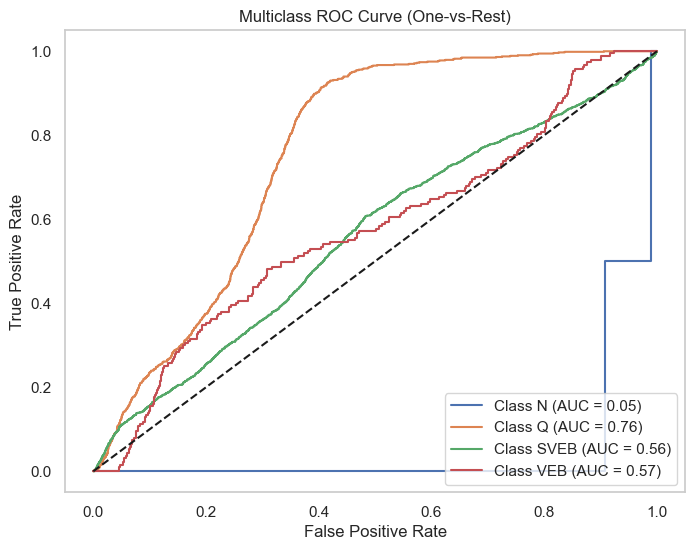

Model Accuracy = 97.8 %
Model recall = 69.6 %
Model precision = 69.3 %
Model f1_score = 69.4 %
Matthews Correlation Coefficient = 0.887
Cohen’s Kappa = 0.887
Log Loss = 0.789
Balanced Accuracy = 0.696
Hamming Loss = 0.022


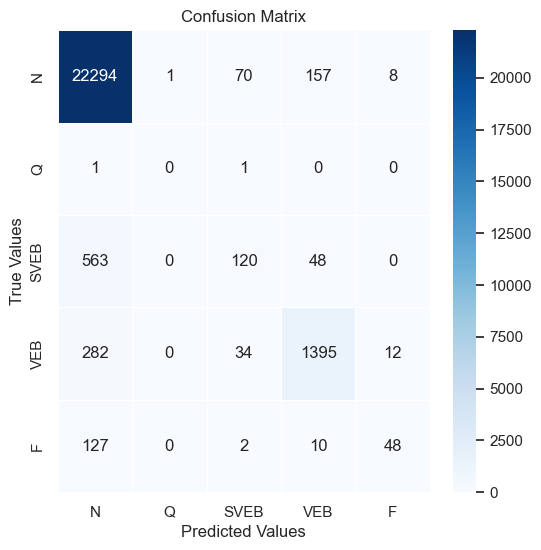

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     22530
           1       0.00      0.00      0.00         2
           2       0.83      0.80      0.82       731
           3       0.92      0.93      0.92      1723
           4       0.72      0.76      0.74       187

    accuracy                           0.98     25173
   macro avg       0.69      0.70      0.69     25173
weighted avg       0.98      0.98      0.98     25173

Skipping class F due to no positive samples in y_true.


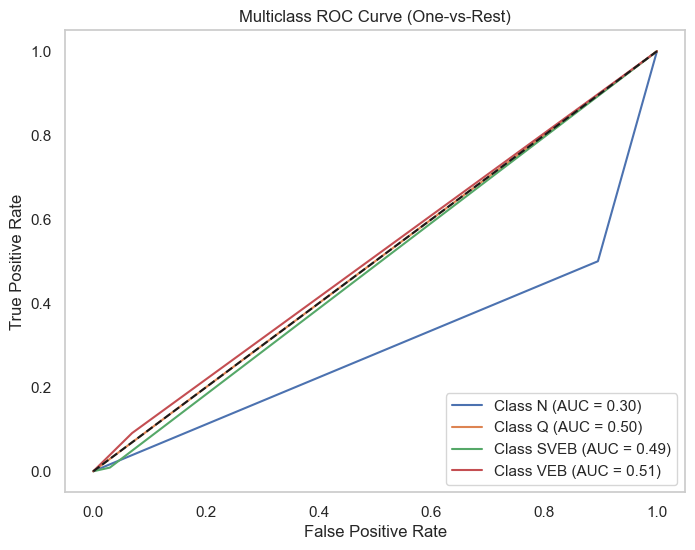

Model Accuracy = 98.9 %
Model recall = 70.9 %
Model precision = 77.8 %
Model f1_score = 74.0 %
Matthews Correlation Coefficient = 0.941
Cohen’s Kappa = 0.941
Log Loss = 0.050
Balanced Accuracy = 0.709
Hamming Loss = 0.011


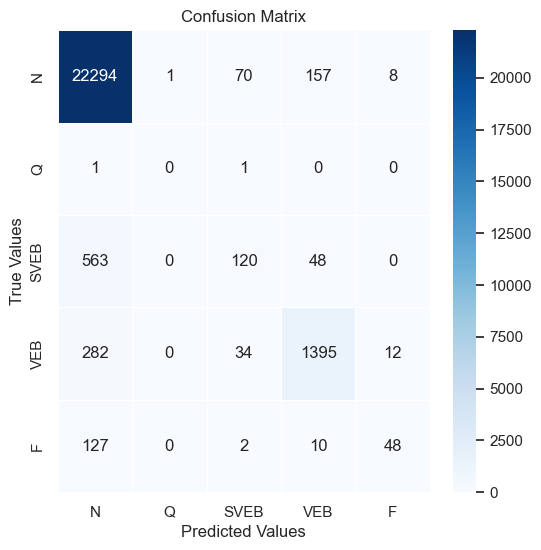

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     22530
           1       0.00      0.00      0.00         2
           2       0.98      0.81      0.88       731
           3       0.98      0.97      0.97      1723
           4       0.95      0.78      0.85       187

    accuracy                           0.99     25173
   macro avg       0.78      0.71      0.74     25173
weighted avg       0.99      0.99      0.99     25173

Skipping class F due to no positive samples in y_true.


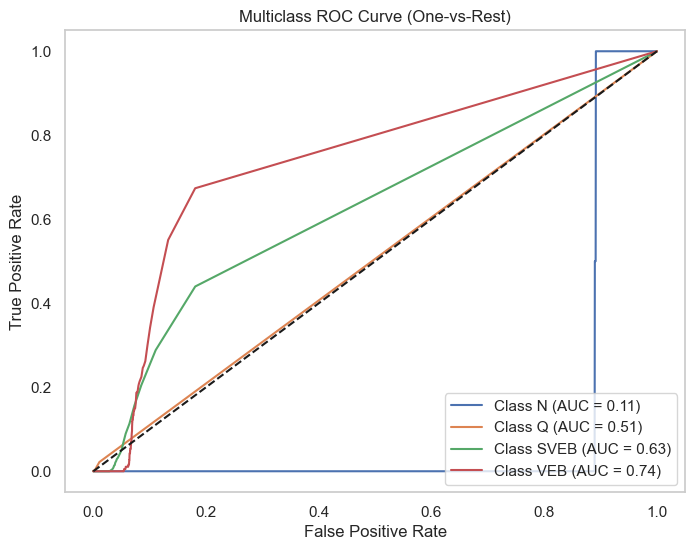

Model Accuracy = 71.5 %
Model recall = 65.3 %
Model precision = 37.0 %
Model f1_score = 37.1 %
Matthews Correlation Coefficient = 0.356
Cohen’s Kappa = 0.283
Log Loss = 2.064
Balanced Accuracy = 0.653
Hamming Loss = 0.285


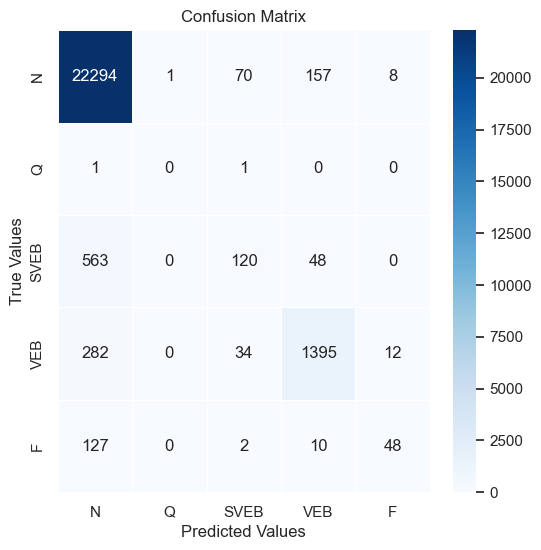

              precision    recall  f1-score   support

           0       0.97      0.71      0.82     22530
           1       0.00      0.50      0.00         2
           2       0.12      0.80      0.21       731
           3       0.69      0.71      0.70      1723
           4       0.07      0.55      0.12       187

    accuracy                           0.71     25173
   macro avg       0.37      0.65      0.37     25173
weighted avg       0.92      0.71      0.79     25173

Skipping class F due to no positive samples in y_true.


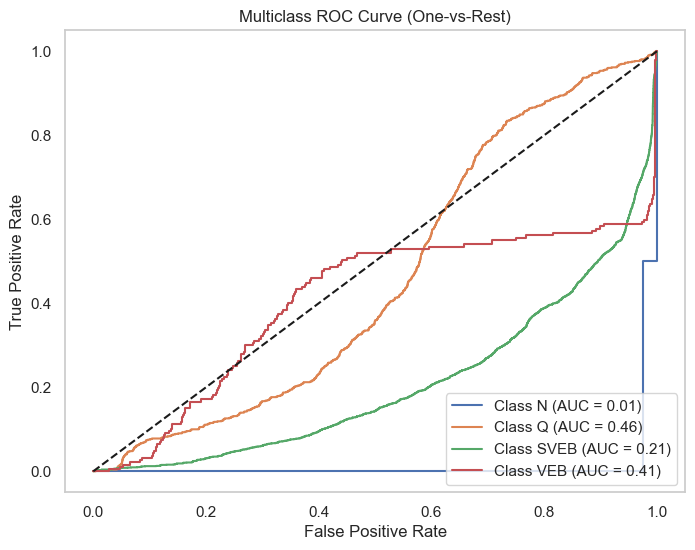

Model Accuracy = 98.1 %
Model recall = 67.8 %
Model precision = 75.7 %
Model f1_score = 71.4 %
Matthews Correlation Coefficient = 0.898
Cohen’s Kappa = 0.896
Log Loss = 0.130
Balanced Accuracy = 0.678
Hamming Loss = 0.019


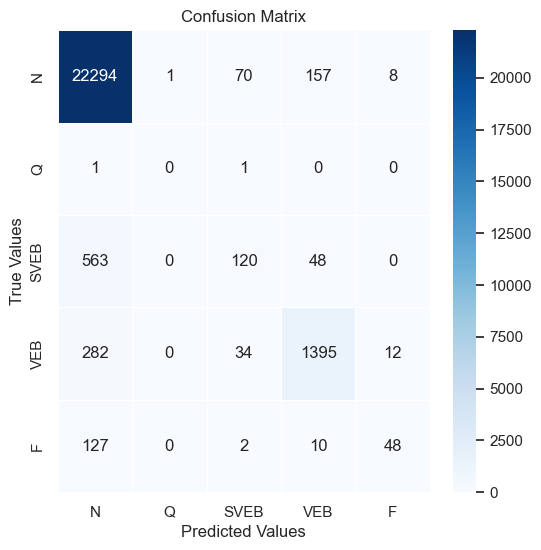

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     22530
           1       0.00      0.00      0.00         2
           2       0.94      0.73      0.82       731
           3       0.97      0.90      0.93      1723
           4       0.89      0.76      0.82       187

    accuracy                           0.98     25173
   macro avg       0.76      0.68      0.71     25173
weighted avg       0.98      0.98      0.98     25173

Skipping class F due to no positive samples in y_true.


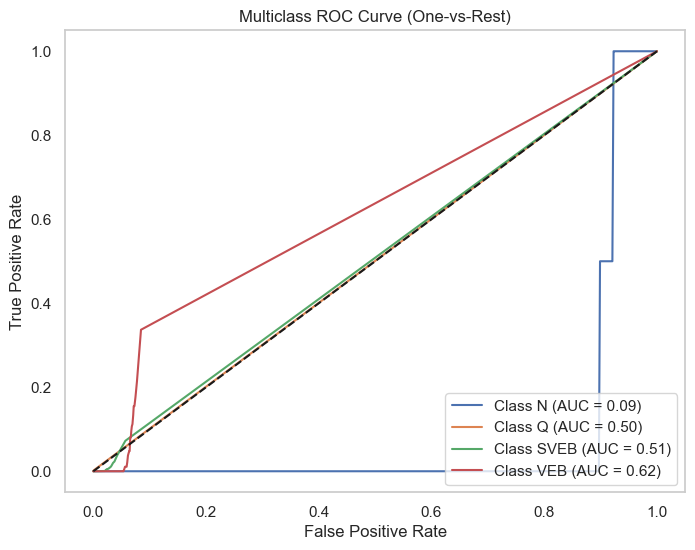

Model Accuracy = 98.7 %
Model recall = 68.8 %
Model precision = 77.2 %
Model f1_score = 72.5 %
Matthews Correlation Coefficient = 0.929
Cohen’s Kappa = 0.928
Log Loss = 0.046
Balanced Accuracy = 0.688
Hamming Loss = 0.013


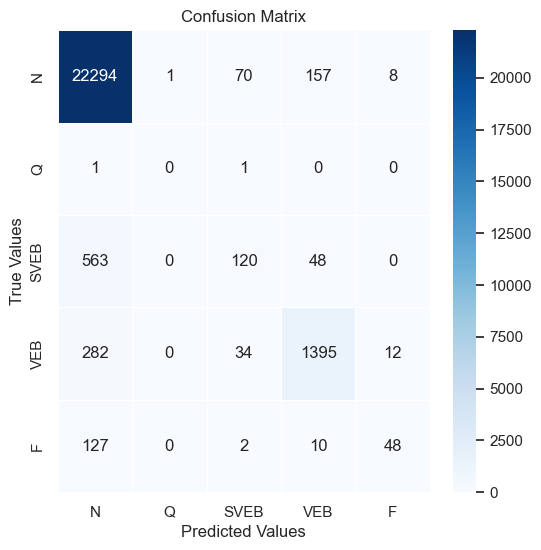

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     22530
           1       0.00      0.00      0.00         2
           2       0.96      0.75      0.84       731
           3       0.98      0.96      0.97      1723
           4       0.93      0.73      0.82       187

    accuracy                           0.99     25173
   macro avg       0.77      0.69      0.73     25173
weighted avg       0.99      0.99      0.99     25173

Skipping class F due to no positive samples in y_true.


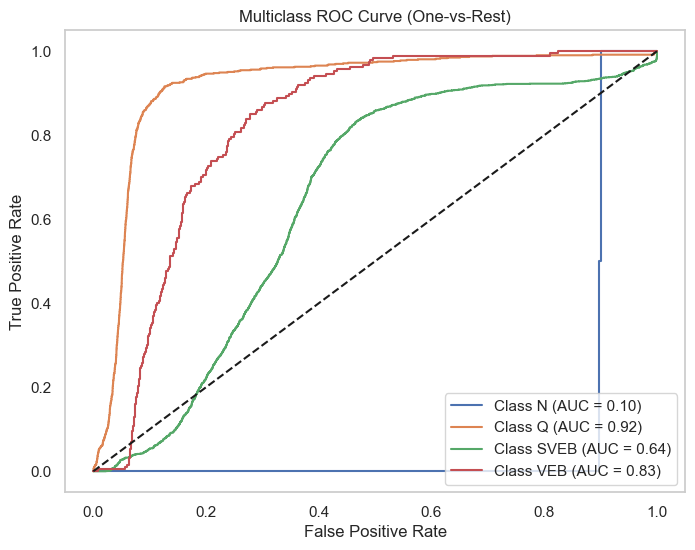

Model Accuracy = 98.8 %
Model recall = 73.0 %
Model precision = 74.4 %
Model f1_score = 73.7 %
Matthews Correlation Coefficient = 0.940
Cohen’s Kappa = 0.940
Log Loss = 0.060
Balanced Accuracy = 0.730
Hamming Loss = 0.012


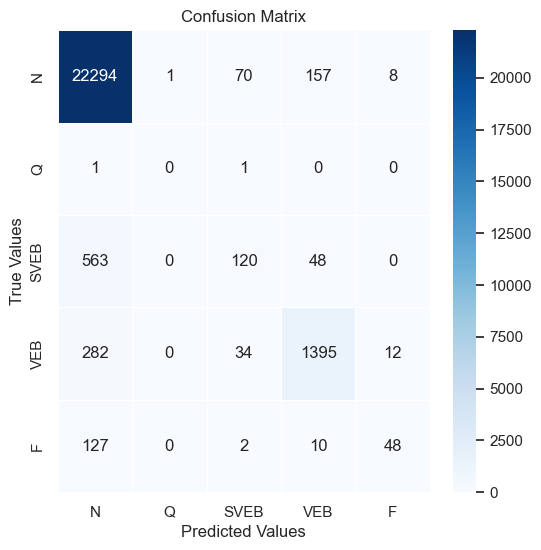

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     22530
           1       0.00      0.00      0.00         2
           2       0.91      0.88      0.90       731
           3       0.96      0.97      0.97      1723
           4       0.85      0.80      0.83       187

    accuracy                           0.99     25173
   macro avg       0.74      0.73      0.74     25173
weighted avg       0.99      0.99      0.99     25173

Skipping class F due to no positive samples in y_true.


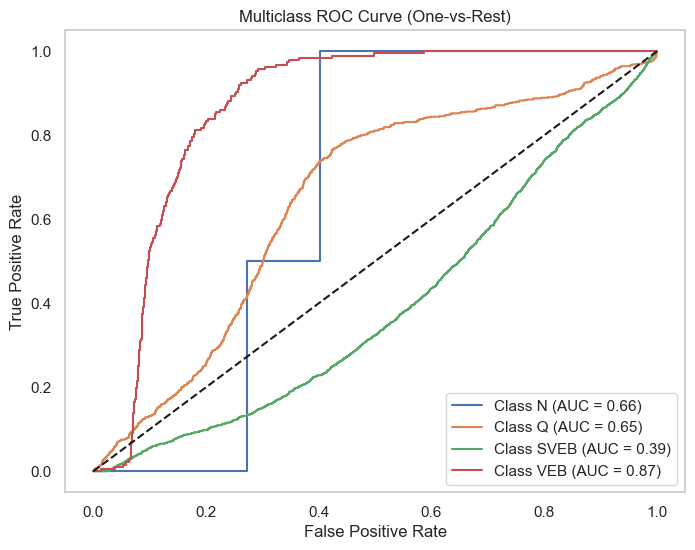

Model Comparison:
                  Model  Accuracy    recall  precision  f1 Score
2        Random Forest  0.988917  0.709237   0.778404  0.740472
6       Neural Network  0.988361  0.729940   0.743617  0.736581
5                  SVM  0.986652  0.687846   0.772425  0.725077
4                  Knn  0.981051  0.678317   0.756712  0.713638
1        Decision Tree  0.978111  0.695506   0.692505  0.693845
0  Logistic Regression  0.947722  0.444001   0.611831  0.487535
3          Naive Bayes  0.714893  0.653411   0.369651  0.371151

Prediction Comparison:
       Actual Logistic Decision Tree Random Forest Naive Bayes Knn SVM  \
0          1        1             1             1           2   1   1   
1          1        1             1             1           1   1   1   
2          1        1             1             1           1   1   1   
3          1        1             4             1           1   1   1   
4          1        1             1             1           1   1   1   
...   

In [260]:
# List of models and predictions
# ######finalllly comparidions
model_info = [
    ("Logistic Regression", test_pred_encoded_log, model1),
    ("Decision Tree",        test_pred_encoded_tree, model2),
    ("Random Forest",        test_pred_encoded_random, model3),
    ("Naive Bayes",          test_pred_encoded_NB, model4),
    ("Knn",                  test_pred_encoded_Knn, model5),
    ("SVM",                  test_pred_encoded_SVM, model6),
    ("Neural Network",       test_pred_encoded_NN, model7)
]

# Evaluate all models and store results in a list
results_list = []
for model_name, prediction, model in model_info:
    acc, rec, prec, f1 = evaluation(prediction, model)
    results_list.append([model_name, acc, rec, prec, f1])

# Create DataFrame from the results list
results = pd.DataFrame(results_list, columns=["Model", "Accuracy", "recall", "precision", "f1 Score"])

# Sort results by Accuracy
results = results.sort_values(by="Accuracy", ascending=False)
print("Model Comparison:\n", results)

# Prediction comparison table
prediction_y = pd.DataFrame({
    "Actual": y_test.values,
    "Logistic": test_pred_labels_log,
    "Decision Tree": test_pred_labels_tree,
    "Random Forest": test_pred_labels_random,
    "Naive Bayes": test_pred_labels_NB,
    "Knn": test_pred_labels_Knn,
    "SVM": test_pred_labels_SVM,
    "Neural Network": test_pred_labels_NN
})
print("\nPrediction Comparison:\n", prediction_y)


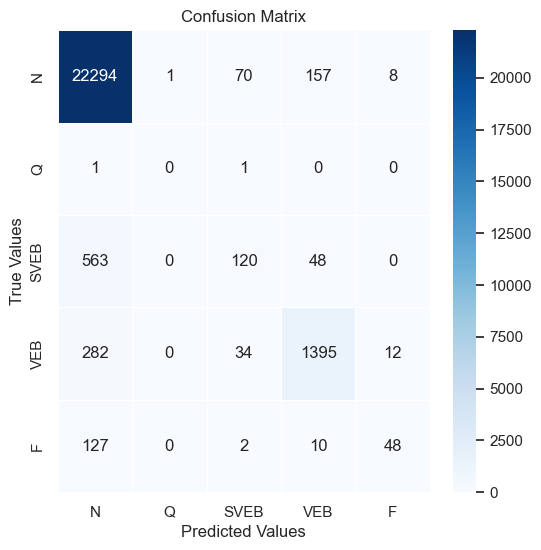

In [ ]:
# Custom function to compute confusion matrix
def compute_confusion_matrix(y_true, y_pred, label_names):
    matrix = np.zeros((len(label_names), len(label_names)), dtype=int)
    # Create a mapping from encoded values to label names
    label_to_index = {i: label for i, label in enumerate(label_names)}  # Use integer indices for encoded labels
    # Loop through true and predicted values
    for true, pred in zip(y_true, y_pred):
        # Map encoded values to labels using the integer indices
        true_label = label_to_index[true]
        pred_label = label_to_index[pred]
        matrix[true][pred] += 1
        
    return pd.DataFrame(matrix, index=label_names, columns=label_names)

# Define label names (this corresponds to the label names in the output)
label_names = ["N", "Q", "SVEB", "VEB", "F"]  # Adjust as per your dataset
# Use sorted unique values of the encoded labels
labels = np.arange(len(label_names))  # Create a list of indices corresponding to label_names

# Assuming y_test_encoded and test_pred_encoded_log are already available
# Compute the confusion matrix using the custom function
cm_df = compute_confusion_matrix(y_test_encoded, test_pred_encoded_log, label_names)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(6, 6))
ax = sns.heatmap(cm_df, annot=True, cmap="Blues", fmt="d", linewidths=0.5)
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('True Values')
plt.show()
